### Data Visualization and Insights

Work as of October 8, 2021. Collaborated works from: Victor Cuspinera, Mudit Jindal, Ayoub Berdeddouch, Prakash Om, Gerson Cruz. 

#### Import Libraries and Set up Path

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import re

%matplotlib inline

# for translation
import sys
sys.path.append('../')
from Translate_data import translate_data

# to plot
import altair as alt
alt.renderers.enable('mimetype')
# alt.renderers.enable('notebook')
# alt.renderers.enable('default')


# root to call the data 
root = "../../../data/"

In [2]:
# Set Display Options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Load Data
df = pd.read_csv(root + 'saber_combined_all_fields.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head(3)

estu_tipodocumento estu_nacionalidad estu_genero estu_fechanacimiento  \
0                 TI          COLOMBIA           M           30/07/1996   
1                 CC          COLOMBIA           M           13/04/1994   
2                 CC          COLOMBIA           F           08/12/1991   

  estu_exterior  periodo estu_consecutivo estu_estadocivil estu_estudiante  \
0           NaN    20134   EK201340233804          Soltero      ESTUDIANTE   
1           NaN    20133   EK201330220754          Soltero      ESTUDIANTE   
2           NaN    20134   EK201340246502          Soltero      ESTUDIANTE   

  estu_pais_reside estu_tieneetnia estu_depto_reside  estu_cod_reside_depto  \
0         COLOMBIA             NaN            BOYACA                   15.0   
1         COLOMBIA             NaN          AMAZONAS                   91.0   
2         COLOMBIA             NaN         RISARALDA                   66.0   

  estu_mcpio_reside  estu_cod_reside_mcpio estu_tituloobtenidobachiller  \
0          GUATEQUE                15322.0            Bachiller técnico   
1           LETICIA                91001.0          Bachiller académico   
2      DOSQUEBRADAS                66170.0            Bachiller técnico   

   estu_ano_examenestado_sb11 estu_semestre_examenestadosb11  \
0                      2013.0                Primer semestre   
1                      2012.0               Segundo semestre   
2                      2012.0               Segundo semestre   

      estu_porcentajecreditosaprob estu_valormatriculauniversidad  \
0  No sigue el sistema de créditos              No pagó matrícula   
1                    Menos del 75%              No pagó matrícula   
2  No sigue el sistema de créditos              No pagó matrícula   

  estu_pagomatriculabeca estu_pagomatriculacredito estu_pagomatriculapadres  \
0                    NaN                       NaN                      NaN   
1                    NaN                       NaN                      NaN   
2                    NaN                       NaN                      NaN   

  estu_pagomatriculapropio estu_tomo_cursopreparacion estu_cursodocentesies  \
0                      NaN                        NaN                   NaN   
1                      NaN                         Si   Entre 20 y 30 horas   
2                      NaN                         No         No tomó Curso   

  estu_cursoiesapoyoexterno estu_cursoiesexterna estu_simulacrotipoicfes  \
0                       NaN                  NaN                     NaN   
1       Entre 20 y 30 horas        No tomó curso                      Si   
2             No tomó Curso        No tomó curso                      No   

  estu_actividadrefuerzoareas estu_actividadrefuerzogeneric  \
0                         NaN                           NaN   
1                          Si                            Si   
2                          No                            No   

   estu_semestrecursa          fami_hogaractual fami_cabezafamilia  \
0                 2.0  Es habitual o permanente                 No   
1                 2.0  Es habitual o permanente                 No   
2                 2.0  Es habitual o permanente                 No   

  fami_numpersonasacargo                 fami_educacionpadre  \
0                Ninguna      Educación profesional completa   
1                Ninguna  Secundaria (Bachillerato) completa   
2                Ninguna                 Primaria incompleta   

                  fami_educacionmadre  \
0  Secundaria (Bachillerato) completa   
1      Técnica o tecnológica completa   
2                 Primaria incompleta   

                           fami_ocupacionpadre           fami_ocupacionmadre  \
0                    Profesional independiente     Profesional independiente   
1  Empleado de nivel auxiliar o administrativo  Trabajador por cuenta propia   
2                   Otra actividad u ocupación                         Hogar   

  fami_trabajolaborp

In [3]:
# Translate data
df_eng = translate_data(df, 'spanish', 'english')
df_eng.head(3)

your_type_of_document your_nationality your_gender your_birthdate  \
0                    TI         COLOMBIA           M     30/07/1996   
1                    CC         COLOMBIA           M     13/04/1994   
2                    CC         COLOMBIA           F     08/12/1991   

  your_foreigner  period your_consecutive your_marital_status your_student  \
0            NaN   20134   EK201340233804              Single      STUDENT   
1            NaN   20133   EK201330220754              Single      STUDENT   
2            NaN   20134   EK201340246502              Single      STUDENT   

  your_country_resides your_have_ethnicity your_dept_resides  \
0             COLOMBIA                 NaN            BOYACA   
1             COLOMBIA                 NaN          AMAZONAS   
2             COLOMBIA                 NaN         RISARALDA   

   your_dept_code_resides your_municipality_resides  \
0                    15.0                  GUATEQUE   
1                    91.0                   LETICIA   
2                    66.0              DOSQUEBRADAS   

   your_municipality_code_resides your_high_school_degree  \
0                         15322.0      Technical Bachelor   
1                         91001.0       Academic Bachelor   
2                         66170.0      Technical Bachelor   

   your_year_exam_sb11 your_semester_exam__b11  \
0               2013.0            1st semester   
1               2012.0            2nd semester   
2               2012.0            2nd semester   

   your_percentage_credits_approved your_tuition_cost_university  \
0  Doesn't follow the credit system          Did not pay tuition   
1                     Less than 75%          Did not pay tuition   
2  Doesn't follow the credit system          Did not pay tuition   

  your_tuition_pymt_scholarship your_tuition_pymt_credit  \
0                           NaN                      NaN   
1                           NaN                      NaN   
2                           NaN                      NaN   

  your_tuition_pymt_parents your_tuition_pymt_yourself  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

  your_i_take_course_preparation   your_course_teacher_ies  \
0                            NaN                       NaN   
1                             Si   Between 20 and 30 hours   
2                             No  He did not take a course   

  your_course_external_support_ies your_course_external_ies  \
0                              NaN                      NaN   
1          Between 20 and 30 hours            No tomó curso   
2         He did not take a course            No tomó curso   

  your_simulation_type_icfes your_activity_strengths_areas  \
0                        NaN                           NaN   
1                         Si                            Si   
2                         No                            No   

  your_activity_strengths_generic  your_on_semester  \
0                             NaN               2.0   
1                              Si               2.0   
2                              No               2.0   

   fami_current_household_type fami_is_the_head_family fami_econ_dependents  \
0  It is habitual or permanent                      No                 None   
1  It is habitual or permanent                      No                 None   
2  It is habitual or permanent                      No                 None   

           fami_father_education         fami_mother_education  \
0  Undergraduate Degree complete        Middle School complete   
1         Middle School complete     Technical School complete   
2   Elementary school incomplete  Elementary school incomplete   

                        fami_father_occupation     fami_mother_occupation  \
0                    Profesional independiente  Profesional independiente   
1  Empleado de nivel auxi

In [4]:
# Wrangling Department

# - - - correct code - - - 
# Change code from float to int
df_eng['your_dept_code_resides'] = df_eng[['your_dept_code_resides']].apply(np.int64).astype(str)
df_eng['your_dept_code_resides.1'] = df_eng[['your_dept_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df_eng['your_dept_code_resides'] = ["0"+i if len(i)==1 else i for i in df_eng['your_dept_code_resides']]
df_eng['your_dept_code_resides.1'] = ["0"+i if len(i)==1 else i for i in df_eng['your_dept_code_resides.1']]

In [5]:
# Wrangling Municipality

# - - - correct name - - - 
import re
municipality_list = list(df_eng['cole_municipality_location'].unique()) + \
                    list(df_eng['your_municipality_resides'].unique()) + \
                    list(df_eng['your_inst_municipality'].unique()) + \
                    list(df_eng['your_municipality_resides.1'].unique())

municipality_list = pd.DataFrame(data=municipality_list, columns=['Name'])#.unique()
municipality_list = list(municipality_list.Name.unique())
municipality_list = [str(i) for i in municipality_list]
municipality_list = sorted(municipality_list)
municipality_values = sorted(municipality_list)

municipality_values = [re.sub(r'BOGOTÁ, D.C.', 'BOGOTÁ D.C.', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CARTAGENA$', 'CARTAGENA DE INDIAS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CHIQUINQUIRA$', 'CHIQUINQUIRÁ', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CIÉNEGA$', 'CIÉNAGA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'PUERTO ASIS$', 'PUERTO ASÍS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'POPAYAN$', 'POPAYÁN', mun) for mun in municipality_values]
municipality_values = [re.sub(r'FACATATIVÁ$', 'FACATATIVA', mun) for mun in municipality_values]

zip_iterator = zip(municipality_list, municipality_values) # Get pairs of elements
municipality_dict = dict(zip_iterator)  # Convert to dictionary

municipality_columns = ['cole_municipality_location', 'your_municipality_resides',
                        'your_inst_municipality', 'your_municipality_resides.1']

for col in municipality_columns:
    df_eng[col] = df_eng[col].map(municipality_dict)
    
# - - - correct code - - - 
# Change code from float to int
df_eng['your_municipality_code_resides'] = df_eng[['your_municipality_code_resides']].apply(np.int64).astype(str)
df_eng['your_municipality_code_resides.1'] = df_eng[['your_municipality_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df_eng['your_municipality_code_resides'] = ["0"+i if len(i)==4 else i for i in df_eng['your_municipality_code_resides']]
df_eng['your_municipality_code_resides.1'] = ["0"+i if len(i)==4 else i for i in df_eng['your_municipality_code_resides.1']]

In [6]:
saber = df_eng.copy() 

In [7]:
saber.head()

your_type_of_document your_nationality your_gender your_birthdate  \
0                    TI         COLOMBIA           M     30/07/1996   
1                    CC         COLOMBIA           M     13/04/1994   
2                    CC         COLOMBIA           F     08/12/1991   
3                    TI         COLOMBIA           F     10/01/1996   
4                    CC         COLOMBIA           M     11/10/1995   

  your_foreigner  period your_consecutive your_marital_status your_student  \
0            NaN   20134   EK201340233804              Single      STUDENT   
1            NaN   20133   EK201330220754              Single      STUDENT   
2            NaN   20134   EK201340246502              Single      STUDENT   
3            NaN   20134   EK201340237996              Single      STUDENT   
4             NO   20173   EK201730119521                 NaN      STUDENT   

  your_country_resides your_have_ethnicity your_dept_resides  \
0             COLOMBIA                 NaN            BOYACA   
1             COLOMBIA                 NaN          AMAZONAS   
2             COLOMBIA                 NaN         RISARALDA   
3             COLOMBIA                 NaN           BOLIVAR   
4             COLOMBIA                  No      CUNDINAMARCA   

  your_dept_code_resides your_municipality_resides  \
0                     15                  GUATEQUE   
1                     91                   LETICIA   
2                     66              DOSQUEBRADAS   
3                     13       CARTAGENA DE INDIAS   
4                     25                    SOACHA   

  your_municipality_code_resides your_high_school_degree  your_year_exam_sb11  \
0                          15322      Technical Bachelor               2013.0   
1                          91001       Academic Bachelor               2012.0   
2                          66170      Technical Bachelor               2012.0   
3                          13001      Technical Bachelor               2012.0   
4                          25754      Technical Bachelor                  NaN   

  your_semester_exam__b11  your_percentage_credits_approved  \
0            1st semester  Doesn't follow the credit system   
1            2nd semester                     Less than 75%   
2            2nd semester  Doesn't follow the credit system   
3            2nd semester  Doesn't follow the credit system   
4                     NaN                               NaN   

                  your_tuition_cost_university your_tuition_pymt_scholarship  \
0                          Did not pay tuition                           NaN   
1                          Did not pay tuition                           NaN   
2                          Did not pay tuition                           NaN   
3                          Did not pay tuition                           NaN   
4  Between 2.5 million and less than 4 million                            No   

  your_tuition_pymt_credit your_tuition_pymt_parents  \
0                      NaN                       NaN   
1                      NaN                       NaN   
2                      NaN                       NaN   
3                      NaN                       NaN   
4                       Si                        No   

  your_tuition_pymt_yourself your_i_take_course_preparation  \
0                        NaN                            NaN   
1                        NaN                             Si   
2                        NaN                             No   
3                        NaN                             No   
4                         No                            NaN   

    your_course_teacher_ies your_course_external_support_ies  \
0                       NaN                              NaN   
1   Between 20 and 30 hours          Between 20 and 30 hours   
2  He did not take a course         He did not take a course   
3  He did not take a course         He did not take a course   
4            

In [8]:
saber.shape

(212010, 143)

In [9]:
# Remove duplicated columns
saber = saber.loc[:, ~saber.columns.duplicated()]
saber.shape

(212010, 142)

In [10]:
saber.describe()

period  your_year_exam_sb11  your_on_semester  \
count  212010.000000         46960.000000      126187.00000   
mean    20170.184156          2011.922466           6.94940   
std        14.162938             2.210888           2.68588   
min     20123.000000          1968.000000           1.00000   
25%     20163.000000          2012.000000           4.00000   
50%     20173.000000          2012.000000           8.00000   
75%     20183.000000          2012.000000           9.00000   
max     20184.000000          2015.000000          11.00000   

       inst_institution_code  your_prgm_academic_snies  \
count          212010.000000             205479.000000   
mean             3476.782727              37047.804530   
std              3810.251141              39054.944918   
min              1101.000000                  1.000000   
25%              1704.000000               2524.000000   
50%              1818.000000              13734.000000   
75%              2849.000000              90876.000000   
max            129593.000000             106552.000000   

       your_prgm_municipality_code  your_inst_municipality_code  \
count                212010.000000                212010.000000   
mean                  27598.687312                 23531.839177   
std                   25442.052235                 23418.009068   
min                    5001.000000                  5001.000000   
25%                   11001.000000                 11001.000000   
50%                   11001.000000                 11001.000000   
75%                   52001.000000                 25175.000000   
max                   99001.000000                 99001.000000   

       score_math_saber_pro  score_language_saber_pro  \
count         212010.000000             212010.000000   
mean             124.132469                125.597165   
std               67.003673                 67.785399   
min                0.000000                  0.000000   
25%              100.000000                101.000000   
50%              145.000000                147.000000   
75%              172.000000                175.000000   
max              300.000000                300.000000   

       score_social_science_saber_pro  score_english_saber_pro  \
count                   212010.000000            212010.000000   
mean                       118.642899               128.173597   
std                         65.291892                69.784358   
min                          0.000000                 0.000000   
25%                         88.000000               109.000000   
50%                        138.000000               147.000000   
75%                        168.000000               179.000000   
max                        300.000000               300.000000   

       score_writing_saber_pro  your_inst_department_code       period.1  \
count            206081.000000              212010.000000  212010.000000   
mean                122.054210                  23.502028   20125.858903   
std                  67.177796                  23.398977       5.155925   
min                   6.600000                   5.000000   20121.000000   
25%                  98.000000                  11.000000   20122.000000   
50%                 141.000000                  11.000000   20122.000000   
75%                 168.000000                  25.000000   20132.000000   
max                 300.000000                  99.000000   20141.000000   

       cole_saber_11_icfes_code  cole_saber_11_icfes_dane  \
count             201007.000000              2.119420e+05   
mean               57303.614804              2.278883e+11   
std                47104.013480              1.016193e+11   
min                    0.000000              3.110010e+10   
25%                16691.000000              1.231820e+11   
50%                42218.000000              1.865680e+11   
75%                97444.000000              3.117690e+11   
max               179358.000000      

In [12]:
saber.info(verbose=True, show_counts=True)

In [13]:
saber.isnull().sum()

your_type_of_document                    0
your_nationality                         0
your_gender                              3
your_birthdate                         121
your_foreigner                       47118
period                                   0
your_consecutive                         0
your_marital_status                  65832
your_student                             0
your_country_resides                     0
your_have_ethnicity                  47432
your_dept_resides                      365
your_dept_code_resides                   0
your_municipality_resides              365
your_municipality_code_resides           0
your_high_school_degree               1876
your_year_exam_sb11                 165050
your_semester_exam__b11             164946
your_percentage_credits_approved    166988
your_tuition_cost_university          4045
your_tuition_pymt_scholarship        45880
your_tuition_pymt_credit             45444
your_tuition_pymt_parents            42130
your_tuitio

## Visualizing NaN Percentage per Column

In [14]:
percent_nan = saber.isnull().sum() * 100 / len(saber)
saber_nan_values = pd.DataFrame({'column_name':saber.columns, 
                                 'percent_nan':percent_nan})

saber_nan_values.sort_values('percent_nan', ascending=False, inplace=True)
saber_nan_values[['percent_nan']]

percent_nan
your_percentage_credits_approved    78.764209
your_i_take_course_preparation      78.429319
your_works_currently                78.099618
fami_monthly_family_income          77.920381
fami_landline_phone                 77.920381
fami_have_oven                      77.920381
fami_social_stratum_sisben_y        77.920381
your_year_exam_sb11                 77.850101
your_semester_exam__b11             77.801047
fami_mobile                         77.799160
fami_fridge                         77.799160
your_course_external_ies            70.681100
your_course_teacher_ies             70.493845
your_course_external_support_ies    70.474034
your_activity_strengths_generic     70.458941
your_activity_strengths_areas       70.457997
your_simulation_type_icfes          70.457526
fami_father_work                    63.555964
fami_mother_work                    63.491345
your_expectations                   62.108391
your_times_took_exam                58.065657
optative_category_saber_11          53.796991
your_on_semester                    40.480638
fami_father_occupation              39.481157
fami_mother_occupation              39.363238
your_marital_status                 31.051366
fami_num_books                      23.007877
your_have_ethnicity                 22.372530
your_foreigner                      22.224423
your_tuition_pymt_scholarship       21.640489
your_tuition_pymt_yourself          21.603226
your_tuition_pymt_credit            21.434838
your_tuition_pymt_parents           19.871704
cole_bilingual                       7.335031
your_area_residse                    6.266686
cole_saber_11_icfes_code             5.189850
fami_oven                            4.889392
fami_father_occupation.1             4.006886
fami_housing_stratum.1               3.678600
fami_computer.1                      3.497477
fami_mother_education.1              3.217773
fami_father_education.1              3.215886
your_prgm_academic_snies             3.080515
score_writing_saber_pro              2.796566
fami_housing_stratum                 2.744210
fami_computer                        2.673930
fami_mother_occupation.1             2.663554
fami_mother_education                2.565445
fami_automobile                      2.526296
fami_father_education                2.474883
fami_internet                        2.433847
your_municipality_resides.1          2.361681
your_dept_resides.1                  2.361681
your_tuition_cost_university         1.907929
your_currently_working               1.630112
your_high_school_degree              0.884864
fami_internet.1                      0.880147
fami_automobile.1                    0.878732
fami_house_members                   0.878732
fami_house_floor                     0.878260
fami_washer                          0.878260
fami_landline_phone.1                0.878260
fami_microwave                       0.878260
fami_dvd                             0.878260
fami_social_stratum_sisben           0.877789
fami_fridge.1                        0.874959
fami_house_rooms                     0.874959
fami_mobile.1                        0.874959
your_tuition                         0.817414
fami_econ_dependents                 0.807981
fami_current_household_type          0.807981
fami_is_the_head_family              0.807037
your_undergraduate_core              0.246686
your_municipality_resides            0.172162
your_dept_resides                    0.172162
cole_character                       0.154238
your_birthdate                       0.057073
cole_saber_11_icfes_dane             0.032074
cole_area_location                   0.028301
score_english_saber_11_category      0.010377
cole_calendar                        0.009434
your_gender.1                        0.004717
cole_dane_code_campus                0.001887
your_gender                          0.001415
score_biology_saber_11               0.000000
score_chemistry_saber_11             0.000000
score_physics_saber_11          

In [15]:
# Categorical features
cat_col=saber.select_dtypes(include='object').columns.to_list()
print(cat_col)

# Numerical features
num_col=saber.select_dtypes(include='number').columns.to_list()
print(num_col)

['your_type_of_document', 'your_nationality', 'your_gender', 'your_birthdate', 'your_foreigner', 'your_consecutive', 'your_marital_status', 'your_student', 'your_country_resides', 'your_have_ethnicity', 'your_dept_resides', 'your_dept_code_resides', 'your_municipality_resides', 'your_municipality_code_resides', 'your_high_school_degree', 'your_semester_exam__b11', 'your_percentage_credits_approved', 'your_tuition_cost_university', 'your_tuition_pymt_scholarship', 'your_tuition_pymt_credit', 'your_tuition_pymt_parents', 'your_tuition_pymt_yourself', 'your_i_take_course_preparation', 'your_course_teacher_ies', 'your_course_external_support_ies', 'your_course_external_ies', 'your_simulation_type_icfes', 'your_activity_strengths_areas', 'your_activity_strengths_generic', 'fami_current_household_type', 'fami_is_the_head_family', 'fami_econ_dependents', 'fami_father_education', 'fami_mother_education', 'fami_father_occupation', 'fami_mother_occupation', 'fami_father_work', 'fami_mother_work'

In [16]:
saber_nan_cat_values = saber_nan_values.loc[cat_col].sort_values('percent_nan', ascending=False)
saber_nan_cat_values.reset_index(drop=True)

column_name  percent_nan
0    your_percentage_credits_approved    78.764209
1      your_i_take_course_preparation    78.429319
2                your_works_currently    78.099618
3          fami_monthly_family_income    77.920381
4                      fami_have_oven    77.920381
5                 fami_landline_phone    77.920381
6        fami_social_stratum_sisben_y    77.920381
7             your_semester_exam__b11    77.801047
8                         fami_fridge    77.799160
9                         fami_mobile    77.799160
10           your_course_external_ies    70.681100
11            your_course_teacher_ies    70.493845
12   your_course_external_support_ies    70.474034
13    your_activity_strengths_generic    70.458941
14      your_activity_strengths_areas    70.457997
15         your_simulation_type_icfes    70.457526
16                   fami_father_work    63.555964
17                   fami_mother_work    63.491345
18                  your_expectations    62.108391
19               your_times_took_exam    58.065657
20         optative_category_saber_11    53.796991
21             fami_father_occupation    39.481157
22             fami_mother_occupation    39.363238
23                your_marital_status    31.051366
24                     fami_num_books    23.007877
25                your_have_ethnicity    22.372530
26                     your_foreigner    22.224423
27      your_tuition_pymt_scholarship    21.640489
28         your_tuition_pymt_yourself    21.603226
29           your_tuition_pymt_credit    21.434838
30          your_tuition_pymt_parents    19.871704
31                     cole_bilingual     7.335031
32                  your_area_residse     6.266686
33                          fami_oven     4.889392
34           fami_father_occupation.1     4.006886
35             fami_housing_stratum.1     3.678600
36                    fami_computer.1     3.497477
37            fami_mother_education.1     3.217773
38            fami_father_education.1     3.215886
39               fami_housing_stratum     2.744210
40                      fami_computer     2.673930
41           fami_mother_occupation.1     2.663554
42              fami_mother_education     2.565445
43                    fami_automobile     2.526296
44              fami_father_education     2.474883
45                      fami_internet     2.433847
46        your_municipality_resides.1     2.361681
47                your_dept_resides.1     2.361681
48       your_tuition_cost_university     1.907929
49             your_currently_working     1.630112
50            your_high_school_degree     0.884864
51                    fami_internet.1     0.880147
52                 fami_house_members     0.878732
53                  fami_automobile.1     0.878732
54                     fami_microwave     0.878260
55                        fami_washer     0.878260
56                   fami_house_floor     0.878260
57              fami_landline_phone.1     0.878260
58                           fami_dvd     0.878260
59         fami_social_stratum_sisben     0.877789
60                      fami_mobile.1     0.874959
61                   fami_house_rooms     0.874959
62                      fami_fridge.1     0.874959
63                       your_tuition     0.817414
64        fami_current_household_type     0.807981
65               fami_econ_dependents     0.807981
66            fami_is_the_head_family     0.807037
67            your_undergraduate_core     0.246686
68          your_municipality_resides     0.172162
69                  your_dept_resides     0.172162
70                     cole_character     0.154238
71                     your_birthdate     0.057073
72                 cole_area_location     0.028301
73    score_english_saber_11_category     0.010377
74                      cole_calendar     0.009434
75                      your_gender.1     0.004717
76                        your_gender     0.001415
77                   cole_main_campus     0.0000

In [17]:
saber_nan_num_values = saber_nan_values.loc[num_col].sort_values('percent_nan', ascending=False)
saber_nan_num_values.reset_index(drop=True)

column_name  percent_nan
0               your_year_exam_sb11    77.850101
1                  your_on_semester    40.480638
2          cole_saber_11_icfes_code     5.189850
3          your_prgm_academic_snies     3.080515
4           score_writing_saber_pro     2.796566
5          cole_saber_11_icfes_dane     0.032074
6             cole_dane_code_campus     0.001887
7            score_physics_saber_11     0.000000
8   cole_municipality_code_location     0.000000
9            score_biology_saber_11     0.000000
10       score_mathematics_saber_11     0.000000
11    score_social_science_saber_11     0.000000
12          score_language_saber_11     0.000000
13          cole_dept_code_location     0.000000
14        score_philosophy_saber_11     0.000000
15           score_english_saber_11     0.000000
16         score_chemistry_saber_11     0.000000
17                           period     0.000000
18                         period.1     0.000000
19        your_inst_department_code     0.000000
20          score_english_saber_pro     0.000000
21   score_social_science_saber_pro     0.000000
22         score_language_saber_pro     0.000000
23             score_math_saber_pro     0.000000
24      your_inst_municipality_code     0.000000
25      your_prgm_municipality_code     0.000000
26            inst_institution_code     0.000000
27          score_optative_saber_11     0.000000

In [18]:
threshold = 20

cat_nan_columns = saber_nan_cat_values[saber_nan_cat_values['percent_nan'] > threshold]['column_name'].to_list()
num_nan_columns = saber_nan_num_values[saber_nan_num_values['percent_nan'] > threshold]['column_name'].to_list()

print("There are {} categorical columns with more than {}% nan values".format(len(cat_nan_columns), threshold))
print("There are {} numerical columns with more than {}% nan values".format(len(num_nan_columns), threshold))

There are 30 categorical columns with more than 20% nan values
There are 2 numerical columns with more than 20% nan values


#### Although there are 32 columns with more than 20% NaN values, I'll be performing some data visualizations to determine the relationships between columns and Saber pro. Some of these categorical columns, albeit having majority NaN values, can tell us something about the distribution of student population across Colombia. 

# Data Visualization

### Questions for Visualization

Looping here the questions I came up with for the initial visualization. Feel free to chime in, add, remove, and change some questions. Question list should be updated as we go along. 

1. What are the statistics of the scores of colombian students based on:
    - Ethnicity
    - Department (Colombian States)
    - Municipality
    - College Degree
    - Social Classes
        - Mother's job
        - Father's job
        - Mother's Education
        - Father's Education
    - Colombian Sisben level
    - Family necessities
        - Internet
        - kiln
        - car
        - fridge
        - cellphone
        - books
        - phone
        - Number of people at home
        - Number of bedrooms
        - Number of floors
    - Mensual Monthly Income 
    - School Type
    - House Stratum
2. Based on the answers from 1, what are the jobs suggested to those who have said statistics?
3. What is the relationship between taking a practice test and general preparation to test scores? Does taking these prep increase test scores? <br>
   3.1 Moreover, what's the social class of those who are able to take these preparation tests? Is there a social divide amongst those who do take and do not?
4. Is there a correlation between the current academic program and the results of Saber? Does the academic program really influence the saber results and vice versa?
5. Which student group got the highest in the respective ICFES areas? Opposite approach: get the highest and lowest of students and determine their classes from there. 
6. Why do students get the lowest score? Why do they get the highest scores?
        





## Students by Nationality

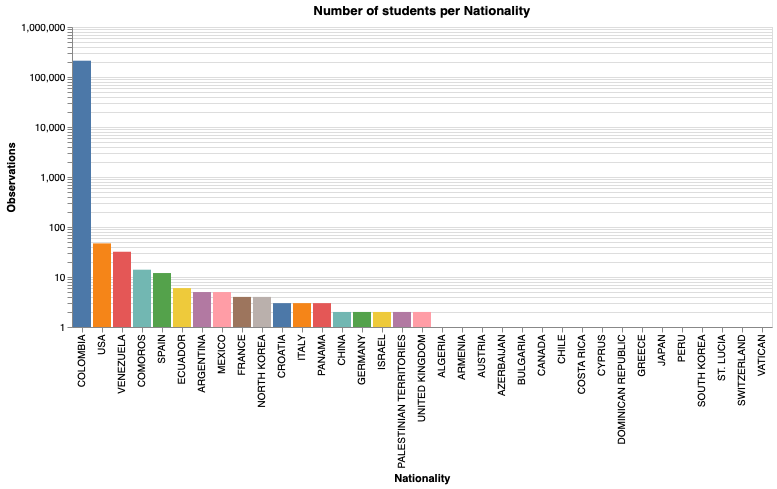

In [23]:
# Nationality
source = df_eng.groupby('your_nationality').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

# source_order = list(source.sort_values(by=['obs'], ascending=False)['your_nationality'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_nationality', sort="-y", title="Nationality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_nationality', legend=None, sort="-y")
).properties(
    title = "Number of students per Nationality"
)

## Students by Gender

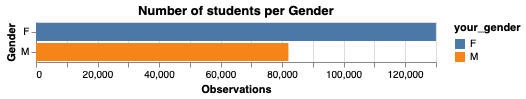

In [24]:
# Gender
source = df_eng.groupby('your_gender').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('your_gender', title="Gender"),
    alt.Color('your_gender')
).properties(
    title = "Number of students per Gender"
)

## Students by Birthdate

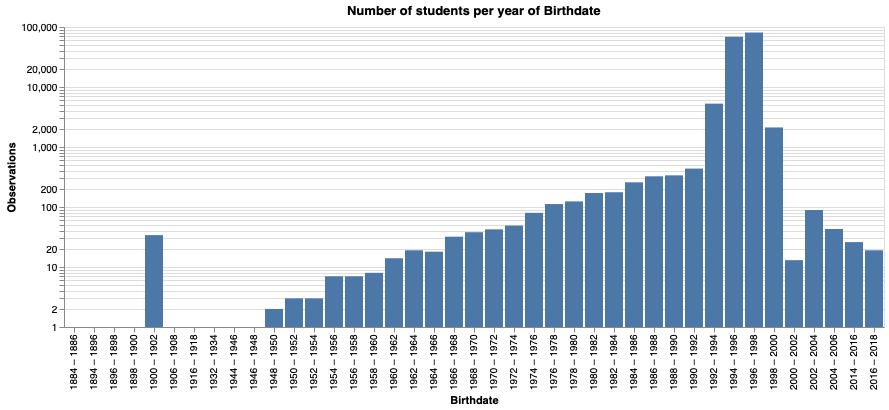

In [25]:
# Birthdate
# pd.DataFrame([pd.to_datetime(df_eng.your_birthdate, errors = 'coerce').dt.to_period('m')]).T
years = [i.year for i in pd.to_datetime(df_eng['your_birthdate'], format='%d/%m/%Y', errors = 'coerce')]
df_hbd = pd.concat([pd.DataFrame(years), df_eng], axis=1, join="inner").rename(columns={0:'your_year_birthdate'})

source = df_hbd.groupby('your_year_birthdate').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('your_year_birthdate:O', title="Birthdate", bin=alt.Bin(maxbins=100)),
    alt.Y('obs', scale=alt.Scale(type='log'), title="Observations")
).properties(
    title = "Number of students per year of Birthdate"
)

## Student Foreigners

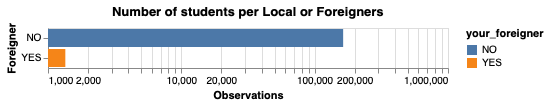

In [26]:
# Foreigners
source = df_eng.groupby('your_foreigner').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_foreigner', title="Foreigner"),
    alt.Color('your_foreigner')
).properties(
    title = "Number of students per Local or Foreigners"
)

## Students by Marital Status

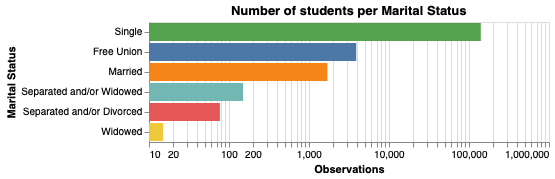

In [28]:
# Marital Status
source = df_eng.groupby('your_marital_status').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_marital_status', sort="-x", title="Marital Status"),
    alt.Color('your_marital_status', legend=None),
    tooltip=['your_marital_status', 'obs']
).properties(
    title = "Number of students per Marital Status"
)

## Students by Residence Country

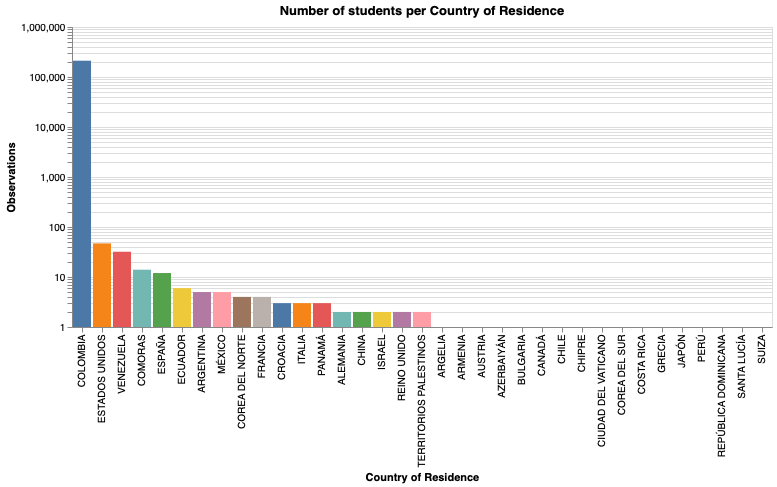

In [30]:
# Country residence
source = df_eng.groupby('your_country_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('your_country_resides', sort="-y", title="Country of Residence"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_country_resides', legend=None, sort="-y")
).properties(
    title = "Number of students per Country of Residence"
)

## Students by Ethnicity

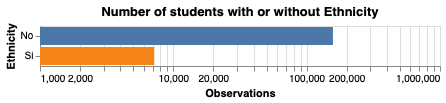

In [31]:
# Ethnicity
source = df_eng.groupby('your_have_ethnicity').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_have_ethnicity', title="Ethnicity"),
    alt.Color('your_have_ethnicity', legend=None),
    tooltip=['your_have_ethnicity', 'obs']
).properties(
    title = "Number of students with or without Ethnicity"
)

## Students by Department of Residence


Number of Departments (States) in Colombia: 34 



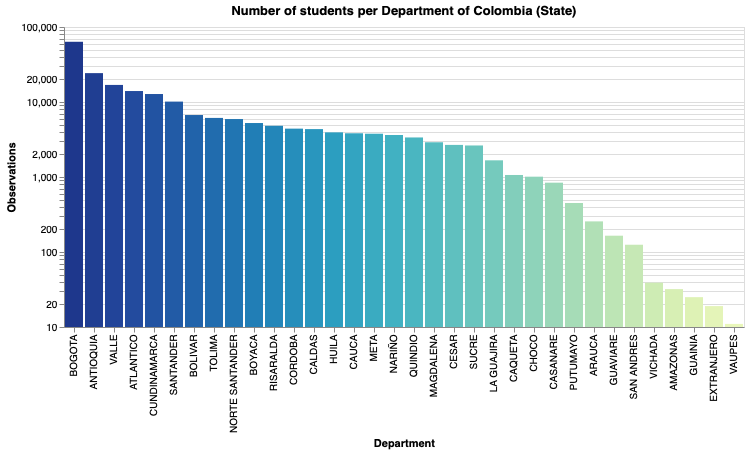

In [42]:
# Department of residence (Colombia states)
source = df_eng.groupby('your_dept_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})
print("\nNumber of Departments (States) in Colombia:", len(source), "\n")

alt.Chart(source).mark_bar().encode(
    alt.X('your_dept_resides', sort='-y', title="Department"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_dept_resides', legend=None, sort='-y', 
              scale=alt.Scale(scheme='yellowgreenblue', reverse=True)
             ),
    tooltip=['your_dept_resides', 'obs']
).properties(
    title = "Number of students per Department of Colombia (State)"
)

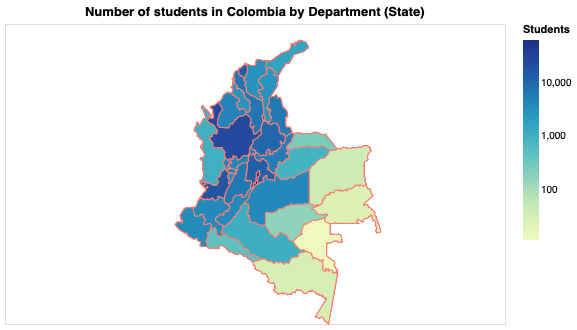

In [41]:
# Plot number of students in Colombia by Department (State)

### DATA ###
# States Polygons
states = alt.topo_feature(root + 'Colombia_departamentos_municipios_poblacion-topo.json', 'MGN_AMN_DPTOS')

# Dataframe of the project 'group by' for plotting
source = df_eng.groupby(['your_dept_resides', 'your_dept_code_resides']).\
        count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs',
                                                                    'your_dept_resides': 'name',
                                                                    'your_dept_code_resides': 'code'})

### PLOT ###
# background
base_depart  = alt.Chart(states).mark_geoshape(
    fill='white',
    stroke='red'
).properties(
    width=500,
    height=300
)

# find Department by code
plot_depart_by_code = alt.Chart(states).mark_geoshape(stroke='salmon').encode(
    alt.Color('obs:Q', scale=alt.Scale(type='log'), title="Students")
).transform_lookup(
    lookup='properties.DPTO_CCDGO',
    from_=alt.LookupData(data=source, key='code', fields=['obs'])
).properties(
    width=500,
    height=300
)

# Integrate the plots
plot_depart = (base_depart + plot_depart_by_code)\
                    .properties(title="Number of students in Colombia by Department (State)")
plot_depart

## Students by High School Degree

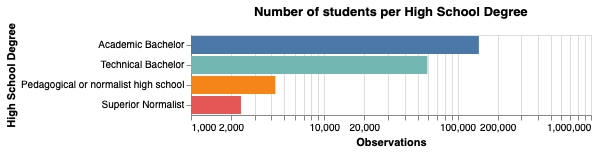

In [33]:
# High School Degree
source = df_eng.groupby('your_high_school_degree').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_high_school_degree', sort='-x', title="High School Degree"),
    alt.Color('your_high_school_degree', legend=None),
    tooltip=['your_high_school_degree', 'obs']
).properties(
    title = "Number of students per High School Degree"
)

## Students by Tuition

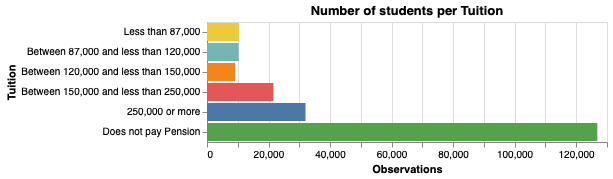

In [34]:
# Tuition
source = df_eng.groupby('your_tuition').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = ['Less than 87,000', 'Between 87,000 and less than 120,000', 'Between 120,000 and less than 150,000',
                'Between 150,000 and less than 250,000', '250,000 or more', 'Does not pay Pension']

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),#, scale=alt.Scale(type='log')),
    alt.Y('your_tuition', sort=source_order, title="Tuition"),
    alt.Color('your_tuition', legend=None),
    tooltip=['your_tuition', 'obs']
).properties(
    title = "Number of students per Tuition"
)


## Students by Municipality


Number of Municipalities in Colombia: 961 



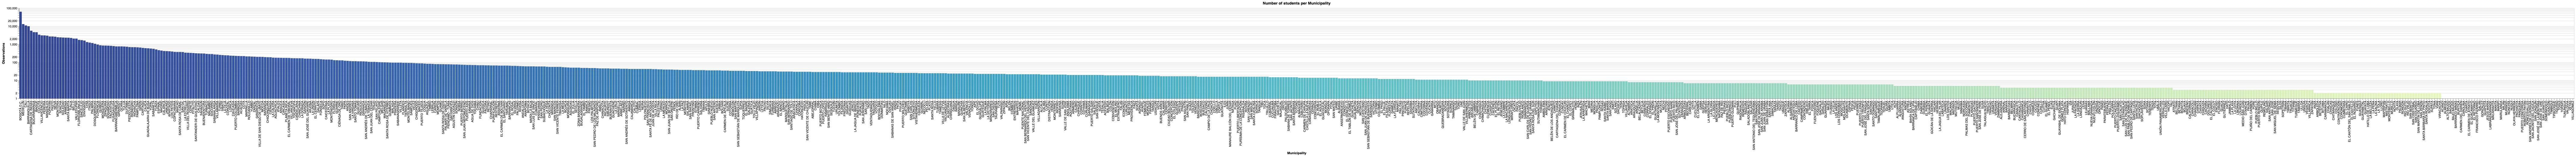

In [43]:
# Municipality
source = df_eng.groupby('your_municipality_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

print("\nNumber of Municipalities in Colombia:", len(source), "\n")

alt.Chart(source).mark_bar(opacity=0.9).encode(
    alt.X('your_municipality_resides', sort='-y', title="Municipality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_municipality_resides', legend=None, sort='-y',
             scale=alt.Scale(scheme='yellowgreenblue', reverse=True)
             ),
    tooltip=['your_municipality_resides', 'obs']
).properties(
    width=8500,
    title = "Number of students per Municipality"
)

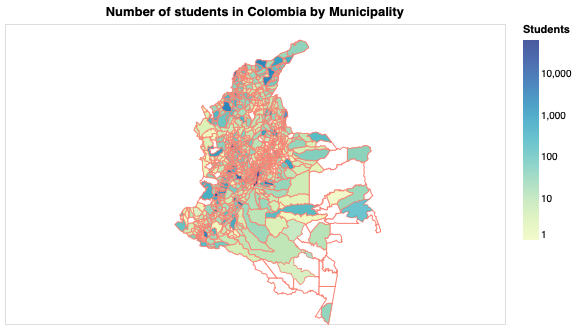

In [44]:
# Plot number of students in Colombia by Municipality

### DATA ###
# States Polygons
municipalities = alt.topo_feature(root + 'Colombia_departamentos_municipios_poblacion-topo.json', 'MGN_AMN_MPIOS')

# Dataframe of the project 'group by' for plotting
source = df_eng.groupby(['your_municipality_resides', 'your_municipality_code_resides']).\
        count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs',
                                                                    'your_municipality_resides': 'name',
                                                                    'your_municipality_code_resides': 'code'})

### PLOT ###
# background
base_municip  = alt.Chart(municipalities).mark_geoshape(
    fill='white',
    stroke='salmon'
).properties(
    width=500,
    height=300
)
 

# find Department by code
plot_municip_by_code = alt.Chart(municipalities).mark_geoshape(opacity=0.8, stroke='salmon').encode(
    alt.Color('obs:Q', scale=alt.Scale(type='log'), title="Students")
).transform_lookup(
    lookup='properties.MPIO_CDPMP',
    from_=alt.LookupData(data=source, key='code', fields=['obs'])
).properties(
    width=500,
    height=300
)

# find Department by Name
plot_municip_by_name = alt.Chart(municipalities).mark_geoshape(opacity=0.8).encode(
    alt.Color('obs:Q', scale=alt.Scale(type='log'), title="Students")
).transform_lookup(
    lookup='properties.MPIO_CNMBR',
    from_=alt.LookupData(data=source, key='name', fields=['obs'])
).properties(
    width=500,
    height=300
)

# Integrate the plots
plot_municip = (base_municip + plot_municip_by_name + plot_municip_by_code)\
                    .properties(title="Number of students in Colombia by Municipality")
plot_municip

## Separating scores variables by saber test 

In [45]:
# Separating the scores into respective lists

marks = [
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11', 
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

saber_marks = [ 
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11',
 ]

saber_pro_marks = [
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

In [46]:
# Adding column of total saber and saber pro scores

saber['total_saber_score'] = saber[saber_marks].sum(axis=1)
saber['total_saber_pro_score'] = saber[saber_pro_marks].sum(axis=1)

In [47]:
saber.head()

your_type_of_document your_nationality your_gender your_birthdate  \
0                    TI         COLOMBIA           M     30/07/1996   
1                    CC         COLOMBIA           M     13/04/1994   
2                    CC         COLOMBIA           F     08/12/1991   
3                    TI         COLOMBIA           F     10/01/1996   
4                    CC         COLOMBIA           M     11/10/1995   

  your_foreigner  period your_consecutive your_marital_status your_student  \
0            NaN   20134   EK201340233804              Single      STUDENT   
1            NaN   20133   EK201330220754              Single      STUDENT   
2            NaN   20134   EK201340246502              Single      STUDENT   
3            NaN   20134   EK201340237996              Single      STUDENT   
4             NO   20173   EK201730119521                 NaN      STUDENT   

  your_country_resides your_have_ethnicity your_dept_resides  \
0             COLOMBIA                 NaN            BOYACA   
1             COLOMBIA                 NaN          AMAZONAS   
2             COLOMBIA                 NaN         RISARALDA   
3             COLOMBIA                 NaN           BOLIVAR   
4             COLOMBIA                  No      CUNDINAMARCA   

  your_dept_code_resides your_municipality_resides  \
0                     15                  GUATEQUE   
1                     91                   LETICIA   
2                     66              DOSQUEBRADAS   
3                     13       CARTAGENA DE INDIAS   
4                     25                    SOACHA   

  your_municipality_code_resides your_high_school_degree  your_year_exam_sb11  \
0                          15322      Technical Bachelor               2013.0   
1                          91001       Academic Bachelor               2012.0   
2                          66170      Technical Bachelor               2012.0   
3                          13001      Technical Bachelor               2012.0   
4                          25754      Technical Bachelor                  NaN   

  your_semester_exam__b11  your_percentage_credits_approved  \
0            1st semester  Doesn't follow the credit system   
1            2nd semester                     Less than 75%   
2            2nd semester  Doesn't follow the credit system   
3            2nd semester  Doesn't follow the credit system   
4                     NaN                               NaN   

                  your_tuition_cost_university your_tuition_pymt_scholarship  \
0                          Did not pay tuition                           NaN   
1                          Did not pay tuition                           NaN   
2                          Did not pay tuition                           NaN   
3                          Did not pay tuition                           NaN   
4  Between 2.5 million and less than 4 million                            No   

  your_tuition_pymt_credit your_tuition_pymt_parents  \
0                      NaN                       NaN   
1                      NaN                       NaN   
2                      NaN                       NaN   
3                      NaN                       NaN   
4                       Si                        No   

  your_tuition_pymt_yourself your_i_take_course_preparation  \
0                        NaN                            NaN   
1                        NaN                             Si   
2                        NaN                             No   
3                        NaN                             No   
4                         No                            NaN   

    your_course_teacher_ies your_course_external_support_ies  \
0                       NaN                              NaN   
1   Between 20 and 30 hours          Between 20 and 30 hours   
2  He did not take a course         He did not take a course   
3  He did not take a course         He did not take a course   
4            

In [48]:
total_marks = ['total_saber_score', 'total_saber_pro_score']

# Scores by Subject for Departments Analysis

#### This visualization aims to present student distribution across Departments (equivalent to Sates of Colombia), by Subject for each Test: Saber-11 and Saber-Pro

### Saber-11

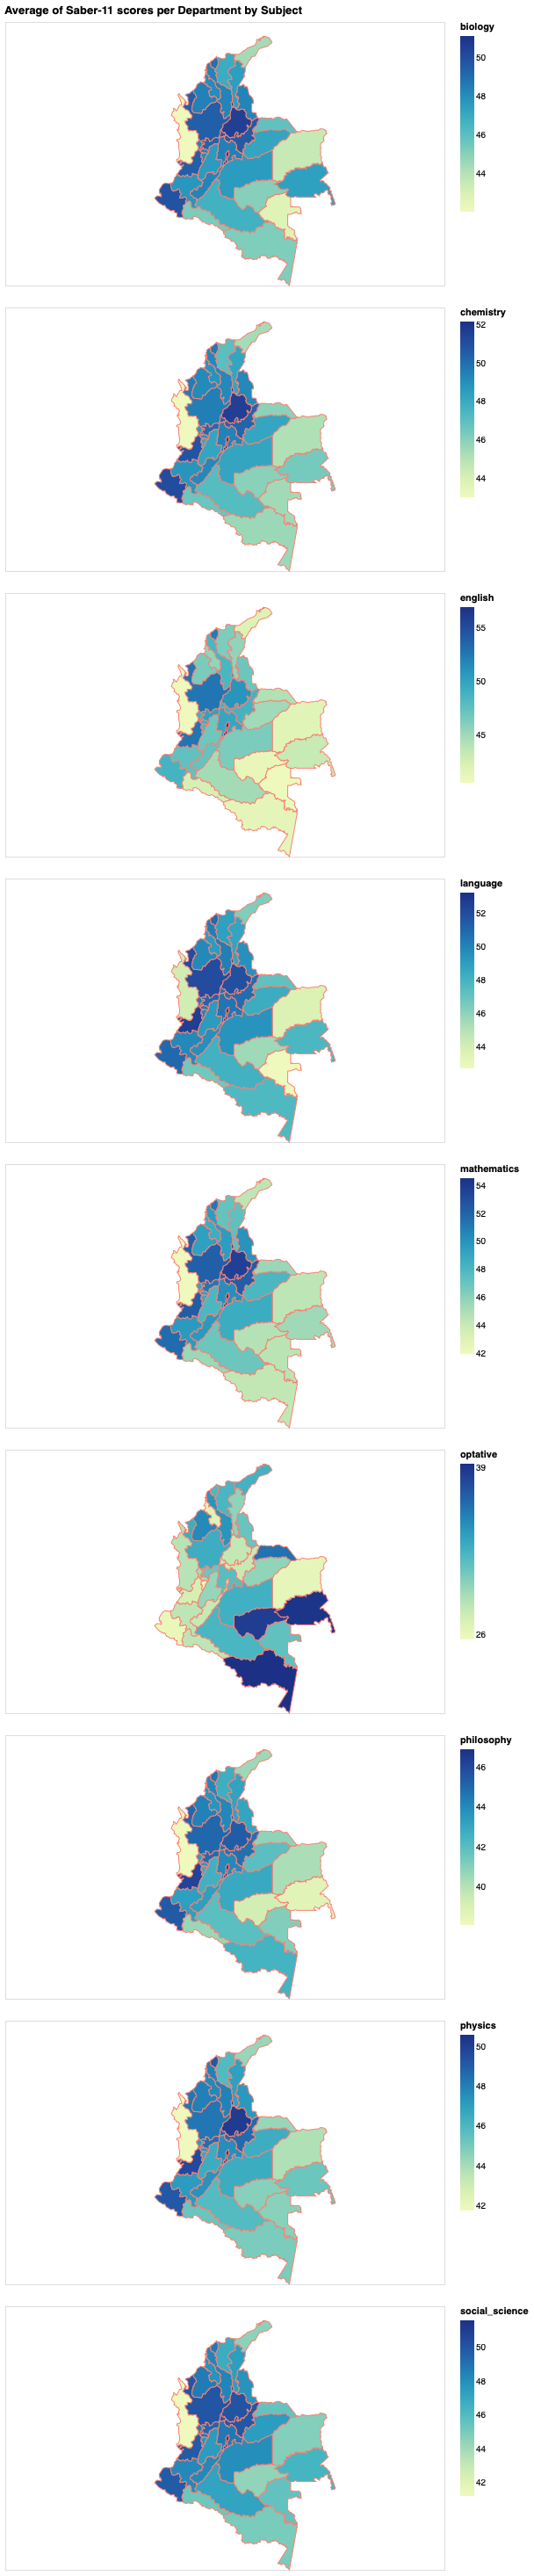

In [50]:
# Average of Saber-11 scores per Department by Subject

source = pd.DataFrame(columns=['your_dept_resides', 'your_dept_code_resides', 'average', 'subject'])
saber_11_scores = ['score_language_saber_11', 'score_mathematics_saber_11', 'score_biology_saber_11', 
                   'score_chemistry_saber_11', 'score_physics_saber_11', 'score_social_science_saber_11', 
                   'score_philosophy_saber_11', 'score_english_saber_11', 'score_optative_saber_11']
saber_11_subjects = ['biology', 'chemistry', 'english', 'language', 'mathematics', 'optative', 'philosophy', 'physics', 'social_science']

for i in saber_11_scores:
    aux = df_eng.groupby(['your_dept_resides', 'your_dept_code_resides']).mean()[[i]].reset_index().rename(columns={i:'average'})
    aux.sort_values(by=['average'], ascending=False, inplace=True)
    aux = pd.concat([aux.head(20), aux.tail(20)])
    aux['subject'] = re.sub(r'_saber_11', '', re.sub(r'score_', '', i)) # Cleans the subject text
    source = pd.concat([source, aux])

source = pd.pivot_table(source, values='average',
                        index=['your_dept_resides', 'your_dept_code_resides'],
                        columns=['subject']).reset_index().rename(columns={'your_dept_resides': 'name',
                                'your_dept_code_resides': 'code'})

### PLOT ###
# find Department by code
plot_saber11_by_code = base_depart.mark_geoshape(stroke='salmon').encode(
#     alt.Color('average:Q', title="Score"), #scale=alt.Scale(type='log'),
    alt.Color(alt.repeat('row'), type='quantitative'),
).transform_lookup(
    lookup='properties.DPTO_CCDGO',
    from_=alt.LookupData(data=source, key='code', fields=saber_11_subjects)
).properties(
    width=500,
    height=300
).repeat(
    row=saber_11_subjects
).resolve_scale(
    color='independent'
)

plot_saber11_by_code.properties(title="Average of Saber-11 scores per Department by Subject")

### Saber-Pro

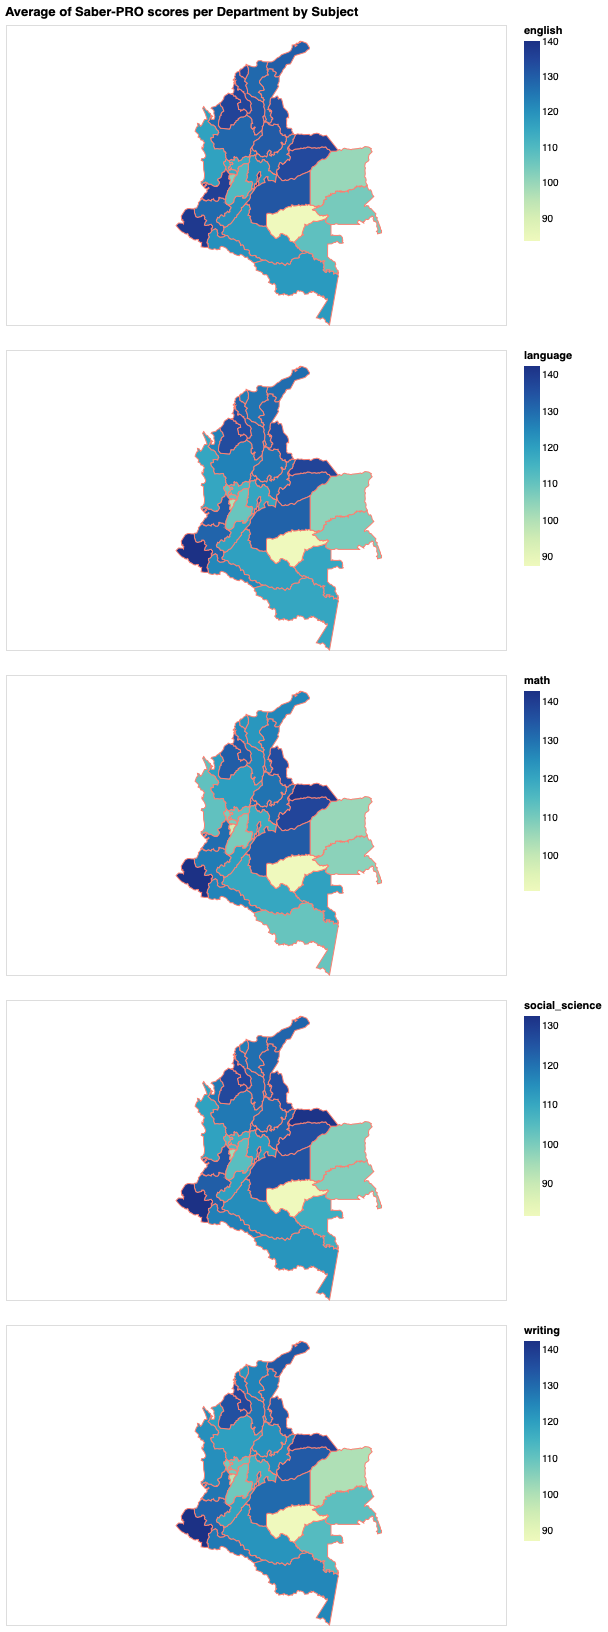

In [51]:
# Average of Saber-PRO scores per Department by Subject

source = pd.DataFrame(columns=['your_dept_resides.1', 'your_dept_code_resides.1', 'average', 'subject'])
saber_PRO_scores = ['score_math_saber_pro', 'score_language_saber_pro', 'score_social_science_saber_pro',
                    'score_english_saber_pro', 'score_writing_saber_pro']
saber_PRO_subjects = ['english', 'language', 'math', 'social_science', 'writing']

for i in saber_PRO_scores:
    aux = df_eng.groupby(['your_dept_resides.1', 'your_dept_code_resides.1']).mean()[[i]].reset_index().rename(columns={i:'average'})
    aux.sort_values(by=['average'], ascending=False, inplace=True)
    aux = pd.concat([aux.head(20), aux.tail(20)])
    aux['subject'] = re.sub(r'_saber_pro', '', re.sub(r'score_', '', i)) # Cleans the subject text
    source = pd.concat([source, aux])

source = pd.pivot_table(source, values='average',
                        index=['your_dept_resides.1', 'your_dept_code_resides.1'],
                        columns=['subject']).reset_index().rename(columns={'your_dept_resides.1': 'name',
                                'your_dept_code_resides.1': 'code'})

### PLOT ###
# find Department by code
plot_saberPRO_by_code = base_depart.mark_geoshape(stroke='salmon').encode(
#     alt.Color('average:Q', title="Score"), #scale=alt.Scale(type='log'),
    alt.Color(alt.repeat('row'), type='quantitative'),
).transform_lookup(
    lookup='properties.DPTO_CCDGO',
    from_=alt.LookupData(data=source, key='code', fields=saber_PRO_subjects)
).properties(
    width=500,
    height=300
).repeat(
    row=saber_PRO_subjects
).resolve_scale(
    color='independent'
)

plot_saberPRO_by_code.properties(title="Average of Saber-PRO scores per Department by Subject")

# Scores by Municipality Analysis

#### This visualization aims to present student distribution across Municipalities. 

##### Note that some Municipalities are not as represented as the others, so municipalities that do not reach the 50th percentile will be dropped to avoid municipalities without enough data points. 

In [33]:
saber_municipality = saber.copy()

In [34]:
saber_municipality_score = saber_municipality.groupby("your_municipality_resides").agg(['mean', 'count'])[total_marks]

In [35]:
threshold = saber_municipality['your_municipality_resides'].value_counts().describe()['50%']
print("The 50th percentile are municipalities that have {} instances in the dataset".format(threshold))

The 50th percentile are municipalities that have 15.0 instances in the dataset


In [36]:
saber_municipality_score = saber_municipality_score[saber_municipality_score['total_saber_score']['count'] > threshold]

In [37]:
top_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

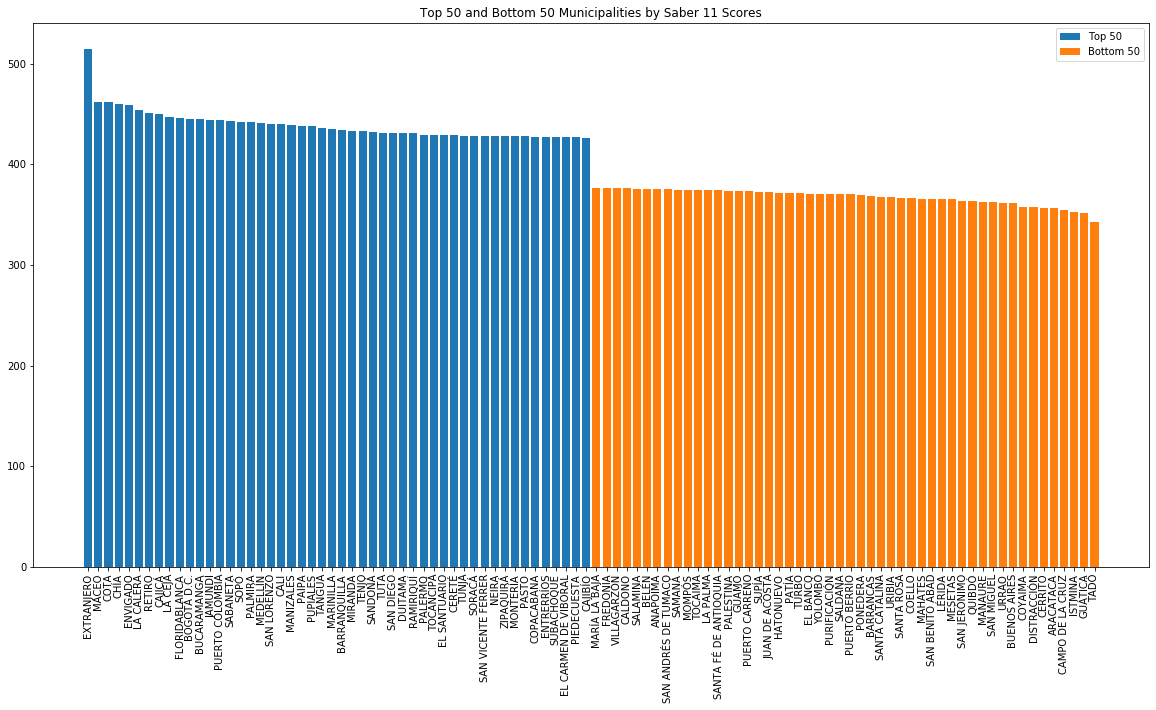

In [38]:
plt.figure(figsize=(20,10))
plt.bar(top_50_saber.index, top_50_saber, label = 'Top 50')
plt.bar(bot_50_saber.index, bot_50_saber, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend()
plt.title('Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

In [39]:
top_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

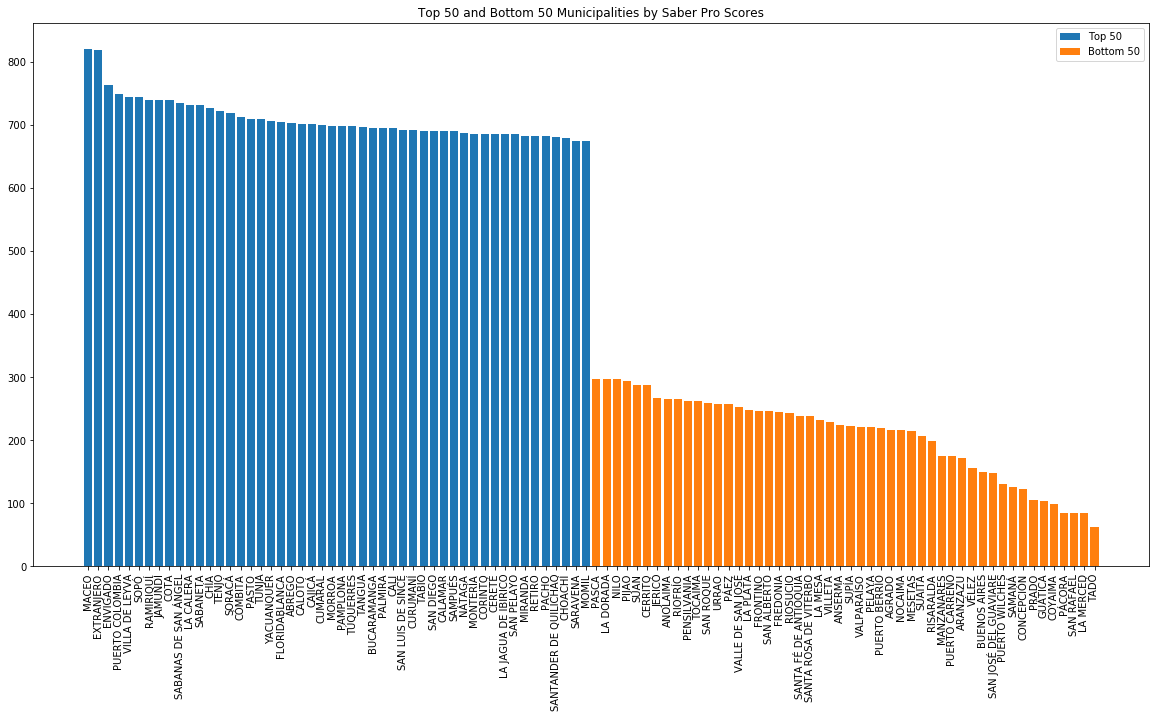

In [40]:
plt.figure(figsize=(20,10))
plt.bar(top_50_saber_pro.index, top_50_saber_pro, label = 'Top 50')
plt.bar(bot_50_saber_pro.index, bot_50_saber_pro, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend()
plt.title('Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

#### From the two graphs, we see that there is a great mean score difference between the Top 50 and Bottom 50 Municipalities. There is an even greater difference in Saber Pro. We will explore these differences by first examining the factors that affect mean scores. 

In [41]:
saber_top_50_municipalities = top_50_saber.index.to_list()
saber_bot_50_municipalities = bot_50_saber.index.to_list()
saber_pro_top_50_municipalities = top_50_saber_pro.index.to_list()
saber_pro_bot_50_municipalities = bot_50_saber_pro.index.to_list()

In [42]:
saber_top_50_municipalities_as_set = set(saber_top_50_municipalities)
saber_top_50_intersection = saber_top_50_municipalities_as_set.intersection(saber_pro_top_50_municipalities)
saber_top_50_intersection_list = list(saber_top_50_intersection)

print("\n There are {} municipalities in the saber and saber pro Top 50.".format(len(saber_top_50_intersection_list)))
print("\n These municipalities are {}".format(saber_top_50_intersection_list))

saber_bot_50_municipalities_as_set = set(saber_bot_50_municipalities)
saber_bot_50_intersection = saber_bot_50_municipalities_as_set.intersection(saber_pro_bot_50_municipalities)
saber_bot_50_intersection_list = list(saber_bot_50_intersection)

print("\n There are {} municipalities in the saber and saber pro Bot 50. \n".format(len(saber_bot_50_intersection_list)))
print("\n These municipalities are {}".format(saber_bot_50_intersection_list))


 There are 26 municipalities in the saber and saber pro Top 50.

 These municipalities are ['LA CALERA', 'PASTO', 'BUCARAMANGA', 'MIRANDA', 'SOPÓ', 'TUNJA', 'RAMIRIQUÍ', 'JAMUNDÍ', 'PUERTO COLOMBIA', 'SORACÁ', 'FLORIDABLANCA', 'SABANETA', 'SAN DIEGO', 'MACEO', 'TANGUA', 'TENJO', 'COTA', 'CHÍA', 'PALMIRA', 'CERETÉ', 'CAJICÁ', 'ENVIGADO', 'MONTERÍA', 'RETIRO', 'CALI', 'EXTRANJERO']

 There are 14 municipalities in the saber and saber pro Bot 50. 


 These municipalities are ['COYAIMA', 'FREDONIA', 'SANTA FÉ DE ANTIOQUIA', 'CERRITO', 'PUERTO CARREÑO', 'SAMANÁ', 'URRAO', 'BUENOS AIRES', 'SUPÍA', 'PUERTO BERRÍO', 'GUÁTICA', 'MESETAS', 'TOCAIMA', 'TADÓ']


We will be taking note of these municipalities as we explore the factors that affect mean saber and saber pro scores. 

## Scores by Social Factors

This section aims to visualize whether certain social factors have an effect to mean scores.

In [43]:
saber.columns.to_list()

['your_type_of_document',
 'your_nationality',
 'your_gender',
 'your_birthdate',
 'your_foreigner',
 'period',
 'your_consecutive',
 'your_marital_status',
 'your_student',
 'your_country_resides',
 'your_have_ethnicity',
 'your_dept_resides',
 'your_dept_code_resides',
 'your_municipality_resides',
 'your_municipality_code_resides',
 'your_high_school_degree',
 'your_year_exam_sb11',
 'your_semester_exam__b11',
 'your_percentage_credits_approved',
 'your_tuition_cost_university',
 'your_tuition_pymt_scholarship',
 'your_tuition_pymt_credit',
 'your_tuition_pymt_parents',
 'your_tuition_pymt_yourself',
 'your_i_take_course_preparation',
 'your_course_teacher_ies',
 'your_course_external_support_ies',
 'your_course_external_ies',
 'your_simulation_type_icfes',
 'your_activity_strengths_areas',
 'your_activity_strengths_generic',
 'your_on_semester',
 'fami_current_household_type',
 'fami_is_the_head_family',
 'fami_econ_dependents',
 'fami_father_education',
 'fami_mother_education',
 

In [44]:
total_marks = ['total_saber_score', 'total_saber_pro_score']

social_factors = ['your_gender', 'your_i_take_course_preparation', 'your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                  'your_simulation_type_icfes', 'your_activity_strengths_generic', 'fami_current_household_type', 'fami_housing_stratum', 'fami_social_stratum_sisben_y', 'fami_monthly_family_income', 'fami_internet',
                  'fami_computer', 'fami_have_oven', 'fami_automobile', 'fami_fridge', 'fami_mobile', 'fami_num_books', 'fami_landline_phone', 'fami_father_education', 'fami_mother_education',
                  'fami_father_occupation', 'fami_mother_occupation', 'fami_father_work','fami_mother_work']

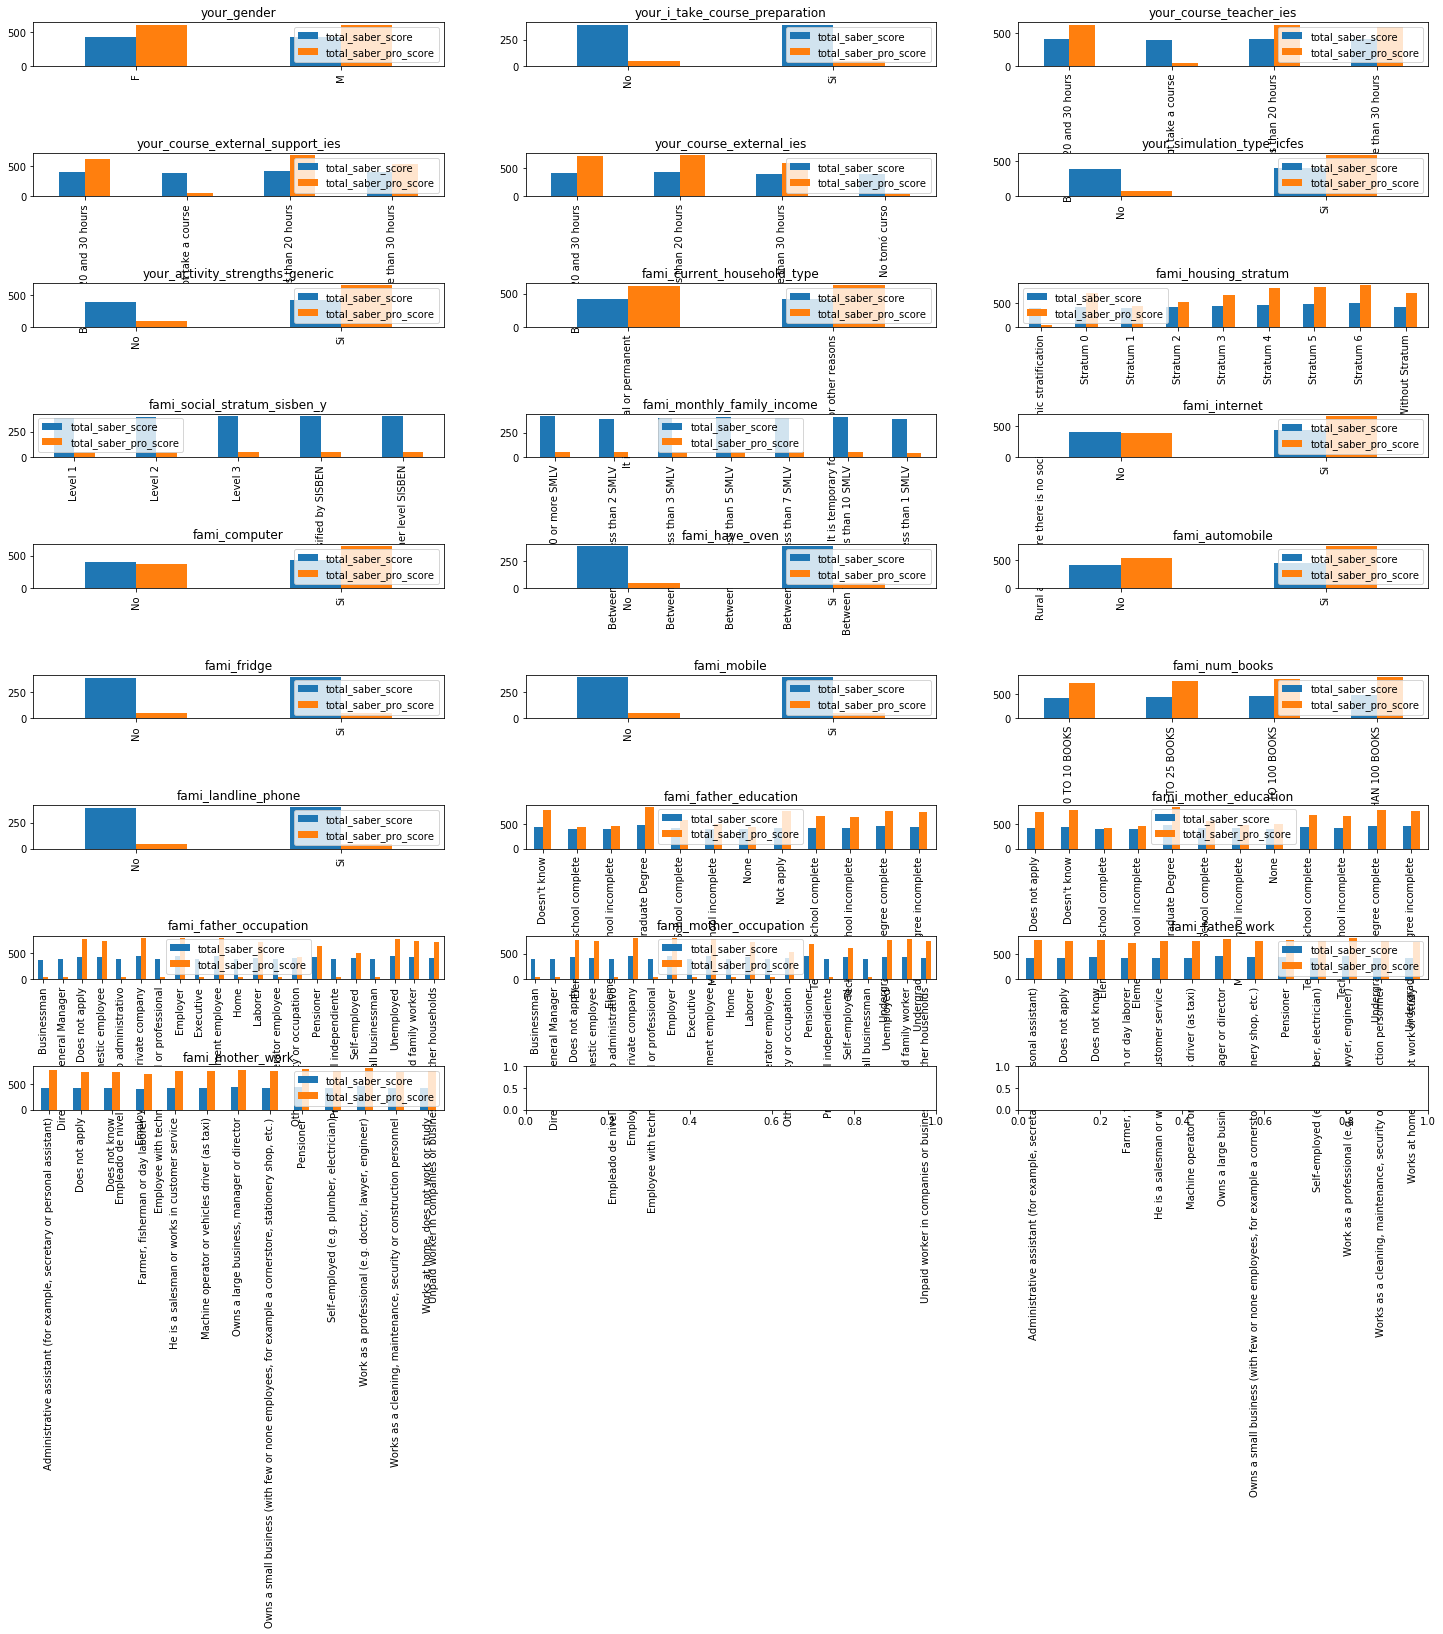

In [45]:
cols = 3
rows = len(social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(25,20))
plt.subplots_adjust(hspace = 2.0)

axe=axs.ravel()

counter = 0

for i in social_factors:
    saber.groupby(saber[i]).mean()[total_marks].plot.bar(ax=axe[counter], title=i, xlabel="")
    counter += 1

*Apologies for the graphing, this is for determination purposes so a graph that contains all needed graphs at once was used*

Based on the results of the graphs above, the following insights are gained:

*Note that the insights are for the MEAN TOTAL SCORES. Insights may differ per subject area or the like. Nonetheless, for overall mean scores for Saber 11 and Saber Pro, these insights are generated.*
  
**For Saber 11 ICFES**
- There is no correlation amongst all the social factors and Saber 11 scores. The scores remain consistent throughout 'Yes' or 'No' answers and other categorical options like 'Occupation' and 'Education of parents. There are no stark outliers observered. 
- Since there are no stark outliers observed from the 'mean', other levels of aggregations are recommended. 

**For Saber 11 Pro**
- The following features have a considerable effect to Saber 11 Pro scores. 
    - Took a  special preparation test?
    - Took another test that's not lectured by the government?
    - Did you did a simulacrum
    - Generic Preparation for Test
    - House Stratum
    - Family has internet?
    - Do you have a computer?
    - Do you have a car?
    - Father's education
    - Mother's education
    - Father's Occupation
    - Mother's Job occupation
  
**For Saber 11 and Saber 11 Pro**
- 'Did student took preparation test' appears to not matter. Whether the student took or not does not change his/her scores.
- 'Sisben level' appears to not matter. The sisben level does not affect overall scores. 
- 'Mensual income' appears to not matter. The monthly income level does not affect overall scores.
- 'Current household type' appears to not matter. This does not affect overall scores.
- kiln, fridge, cellphone, books, and cellphone appear to not matter. Whether one has them or not does not affect overall scores. 

**Now we have found out Saber 11 Pro has the more variance visually, we tie this back to the municipality question: Are the high and low scores of these municipalities affected by these social factors?**

In [46]:
saber_pro_top_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_top_50_municipalities)]
print("There are {} datapoints in the saber dataset for all top 50 municipalities".format(saber_pro_top_50.shape[0]))

saber_pro_bot_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_bot_50_municipalities)]
print("There are {} datapoints in the saber dataset for all bot 50 municipalities".format(saber_pro_bot_50.shape[0]))

There are 33924 datapoints in the saber dataset for all top 50 municipalities
There are 2258 datapoints in the saber dataset for all bot 50 municipalities


In [47]:
relevant_social_factors = ['your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                           'your_simulation_type_icfes', 'your_activity_strengths_generic', 'fami_housing_stratum', 'fami_internet',
                           'fami_computer', 'fami_automobile', 'fami_father_education', 'fami_mother_education',
                           'fami_father_work','fami_mother_work']

## Top 50 Municipalities Saber Pro

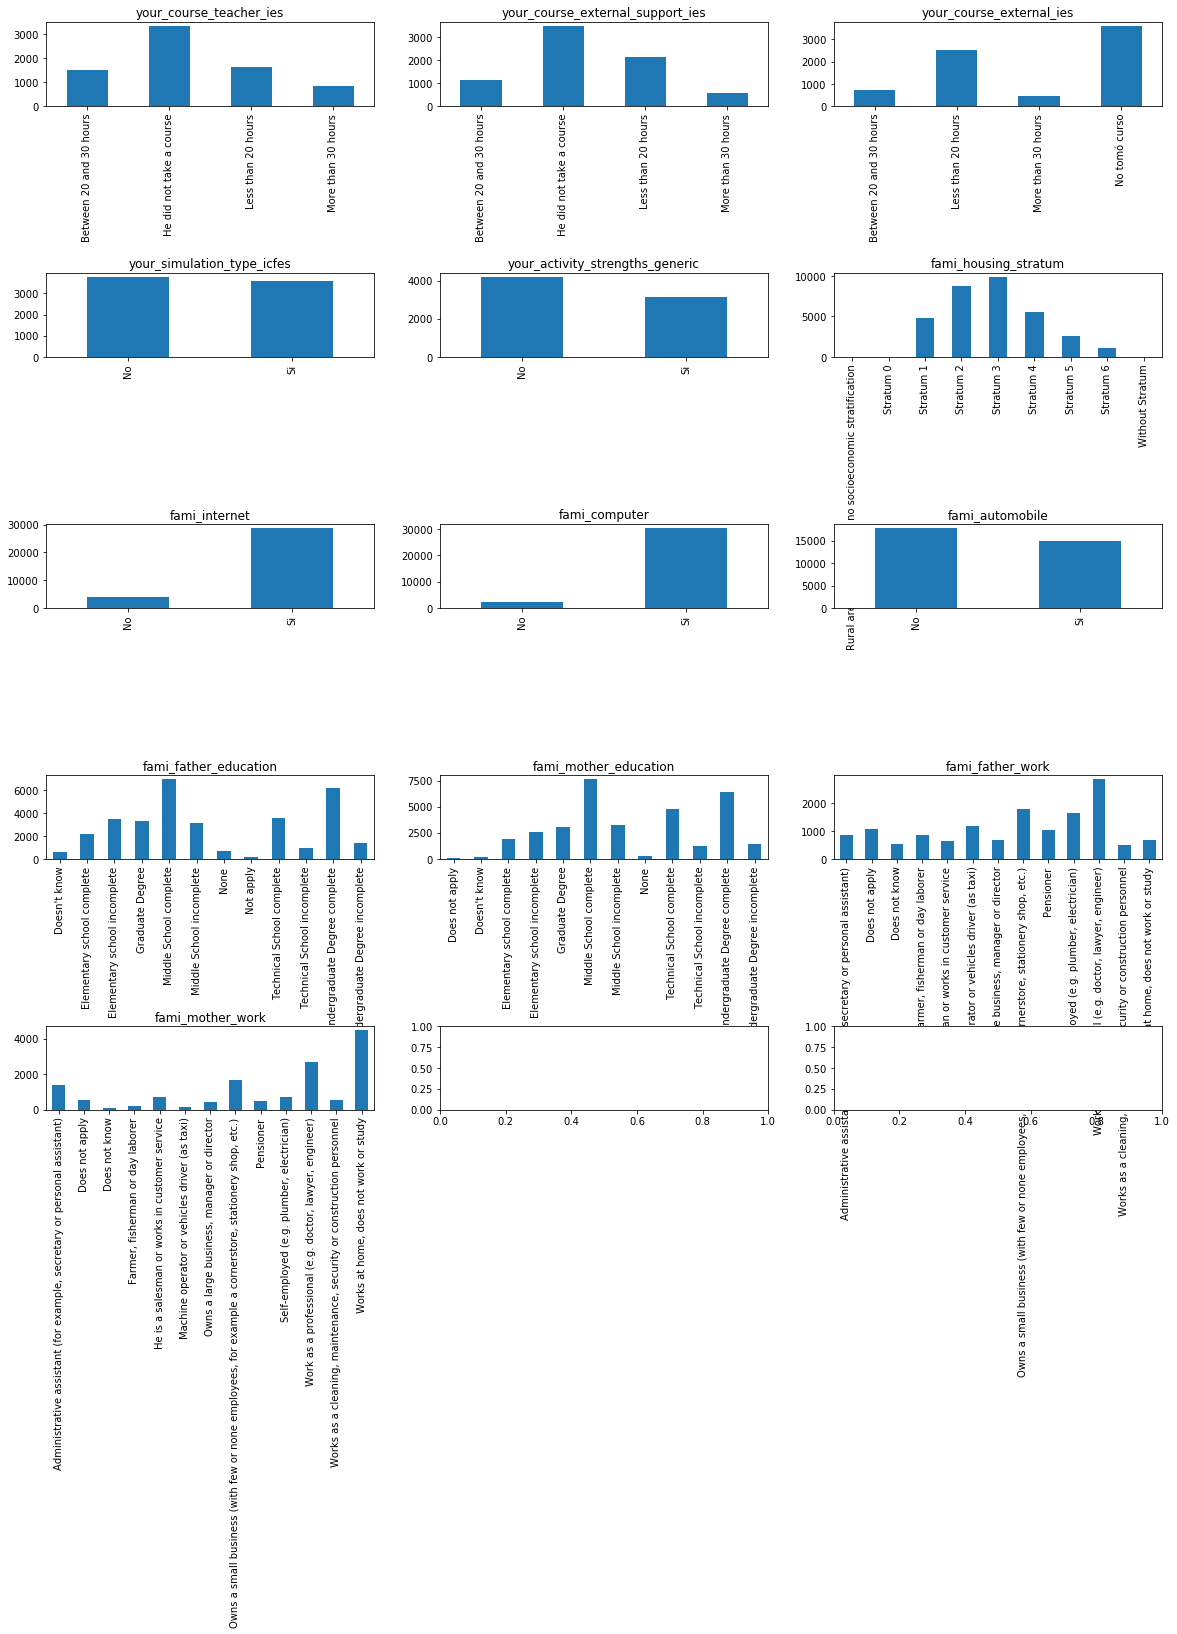

In [48]:
cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 2.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    saber_pro_top_50.groupby(saber_pro_top_50[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter], title=i, xlabel="")
    counter += 1

## Bottom 50 Municipalities Saber Pro

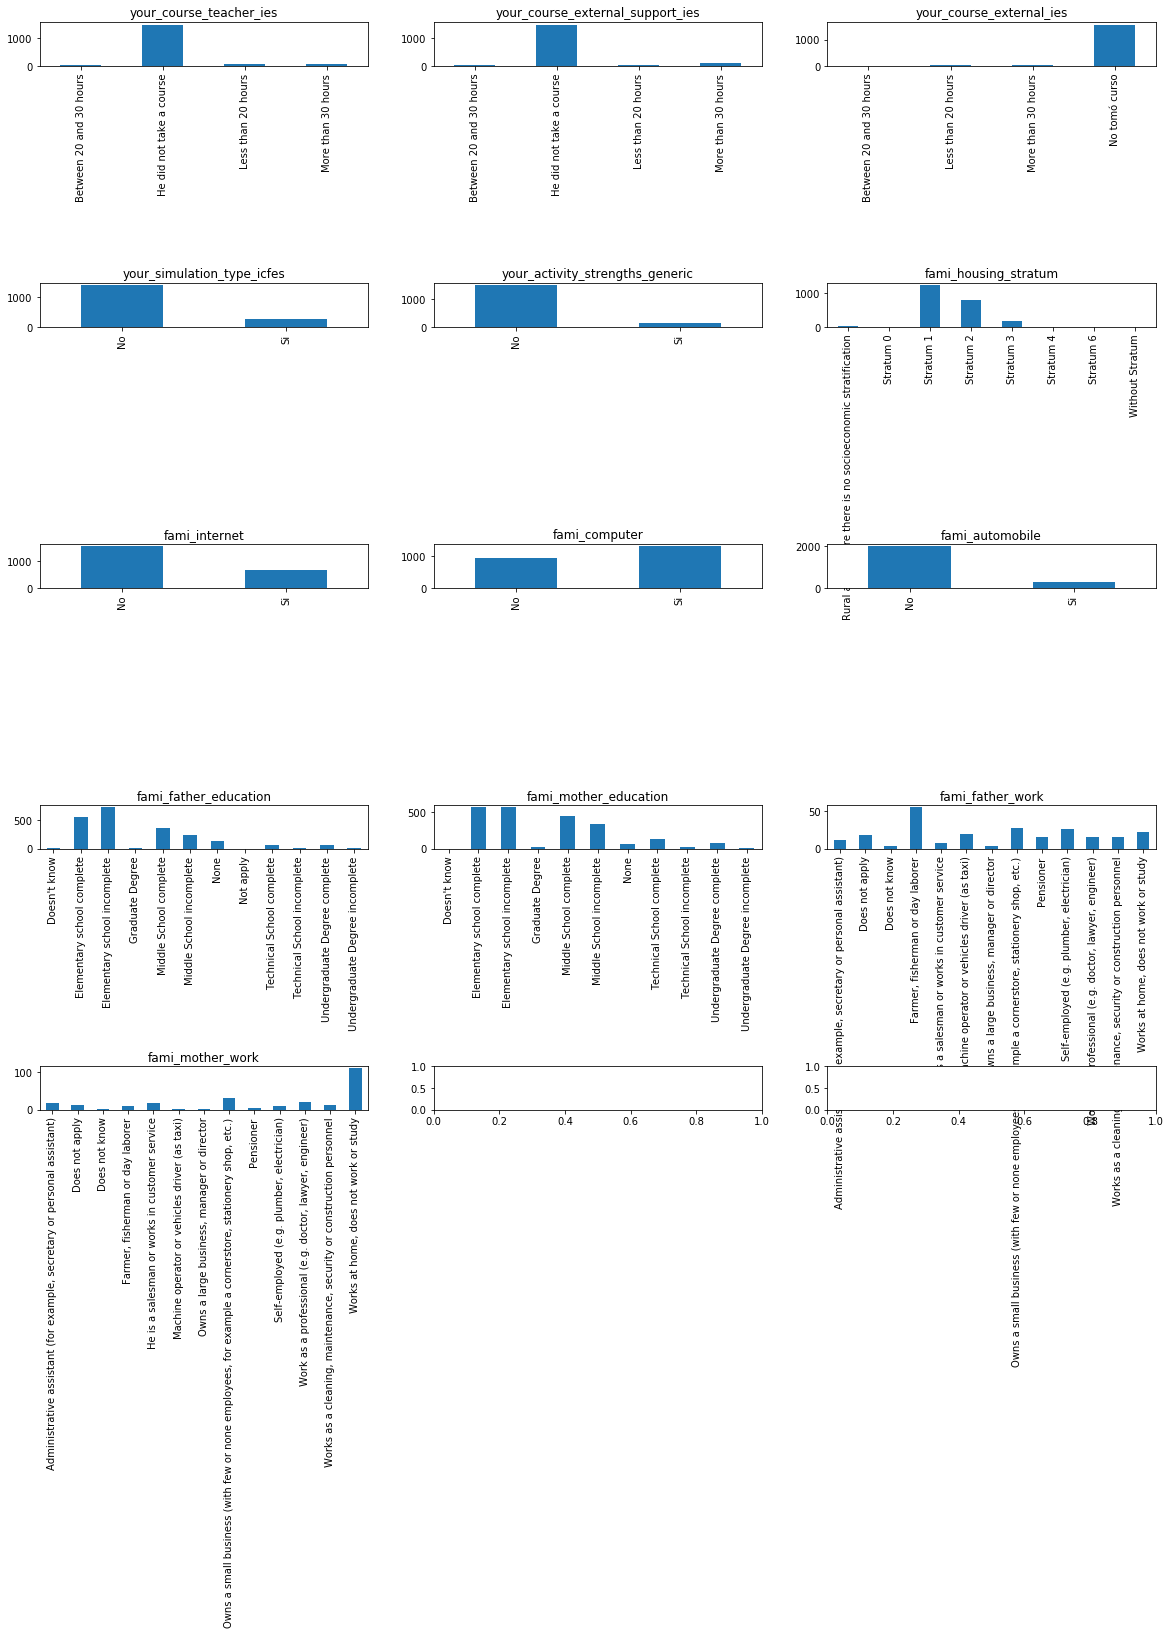

In [49]:
cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 5.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    saber_pro_bot_50.groupby(saber_pro_bot_50[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter], title=i, xlabel="")
    counter += 1

# Insights

### For the Top 50 Municipalities in terms of Saber Pro scores:
1. With regard to taking special preparation tests, simulacrums, and the generic preparation. It appears these factors do not affect as much the overall saber scores of the students as the highest number for each feature still correspond to not taking these tests. 
2. Majority of the students have computers and internet at home. These two features then are relevant to the dataset. 
3. Both the mother and father of students belonging to these municipalities have, in majority, finished at least secondary education. 
4. The father and mother of students belonging to these municipalities have, in majority, have employment belonging to Obrero o empleyado and trabajador por cuenta propia. 

### For the Bottom 50 Municipalities in terms of Saber Pro scores:
1. Majority of the students belonging to these municipalities were not able to take any preparation tests and it led to lower Saber Pro scores. 
2. Majority of the students have computers but no access to the internet. This may cause a decrease in Saber pro scores. 
3. Majority of the students' families belong to Estrata 1 house level, the lowest house levels in Colombia. 
4. A lot of parents in these municipalities have not finished primary school, and at maximum, only completed Secondary School. This shows a stark divide between the top 50 and the bottom 50. 
5. The father's of students belong to the class of pequeno empresário and trabajador por cuenta propia. However, majority of the mother's have jobs at Hogar (Home) which indicates the father is the one earning unlike in Top 50 municipalities where both parents are earning. 

Overall, based on the current analysis, we see that the factors of taking preparation tests, father's education, mother's education, father's occupation, mother's occupation, house stratum, and access to the internet have a greater impact of decreasing scores. Without these factors, Saber Pro scores of students decrease. **There is, then, a stark divide shown between the Top and Bottom Municipalities when it comes to Saber Pro scores.** 

### More Questions October 2, 2021:

1. Formulate more questions to visualize the colombian student population.
2. Determine whether there are more social factors that affect students test scores. 
3. Relate these social factors to whether the Saber scores become accurate to the current academic program of the student. Ask the question: Are these social factors hindering the student in pursuing the program to which he is most logically belonging to?

## Scores by High School Education

#### Question: Does high school education affect total scores?

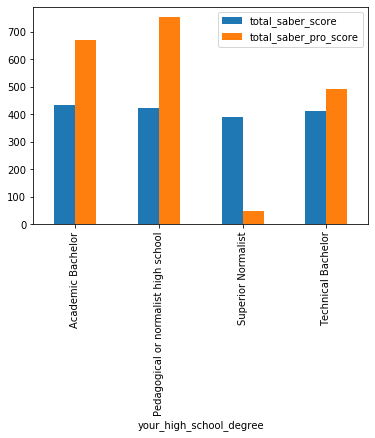

In [50]:
saber.groupby('your_high_school_degree')[total_marks].mean().plot.bar()

It appears students who had a high school degree of superior normalist and technical bachelor have substantially lower saber pro scores. Why? 

### Superior Normalist

In [51]:
hs_degree = ['Superior Normalist']
superior_normalist_saber_pro = saber.loc[saber['your_high_school_degree'].isin(hs_degree)]

In [52]:
superior_normalist_saber_pro

your_type_of_document your_nationality your_gender your_birthdate  \
306                       TI         COLOMBIA           M     24/08/1994   
308                       CC         COLOMBIA           F     15/02/1996   
362                       CC         COLOMBIA           F     31/10/1995   
429                       CC         COLOMBIA           F     21/05/1995   
438                       TI         COLOMBIA           F     23/08/1996   
...                      ...              ...         ...            ...   
211405                    TI         COLOMBIA           F     27/06/1995   
211406                    TI         COLOMBIA           F     20/05/1996   
211633                    CC         COLOMBIA           F     23/07/1983   
211914                    TI         COLOMBIA           F     28/06/1996   
211939                    TI         COLOMBIA           M     05/01/1996   

       your_foreigner  period your_consecutive your_marital_status  \
306               NaN   20143   EK201430174278              Single   
308               NaN   20143   EK201430257099              Single   
362               NaN   20152   EK201520056387              Single   
429               NaN   20143   EK201430168120              Single   
438               NaN   20143   EK201430235690              Single   
...               ...     ...              ...                 ...   
211405            NaN   20143   EK201430049437              Single   
211406            NaN   20143   EK201430223274              Single   
211633            NaN   20142   EK201420083665              Single   
211914            NaN   20143   EK201430111507              Single   
211939            NaN   20143   EK201430215047              Single   

       your_student your_country_resides your_have_ethnicity  \
306         STUDENT             COLOMBIA                 NaN   
308         STUDENT             COLOMBIA                 NaN   
362         STUDENT             COLOMBIA                 NaN   
429         STUDENT             COLOMBIA                 NaN   
438         STUDENT             COLOMBIA                 NaN   
...             ...                  ...                 ...   
211405      STUDENT             COLOMBIA                 NaN   
211406      STUDENT             COLOMBIA                 NaN   
211633      STUDENT             COLOMBIA                 NaN   
211914      STUDENT             COLOMBIA                 NaN   
211939      STUDENT             COLOMBIA                 NaN   

       your_dept_resides  your_dept_code_resides your_municipality_resides  \
306               NARIÑO                    52.0                 SAN PABLO   
308            SANTANDER                    68.0           BARRANCABERMEJA   
362               CALDAS                    17.0                 MANIZALES   
429               CALDAS                    17.0                 MANIZALES   
438              QUINDIO                    63.0                   ARMENIA   
...                  ...                     ...                       ...   
211405         ATLANTICO                     8.0              BARRANQUILLA   
211406            NARIÑO                    52.0                     PASTO   
211633         SANTANDER                    68.0               BUCARAMANGA   
211914      CUNDINAMARCA                    25.0                    SOACHA   
211939         MAGDALENA                    47.0               SANTA MARTA   

        your_municipality_code_resides your_high_school_degree  \
306                            52693.0      Superior Normalist   
308                            68081.0      Superior Normalist   
362                            17001.0      Superior Normalist   
429                            17001.0      Superior Normalist   
438                            63001.0      Superior Normalist   
...                                ...                     ...   
211405                          8001.0      Superior Normalist   
211406             

In [53]:
relevant_social_factors = ['your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                           'your_simulation_type_icfes', 'your_activity_strengths_generic', 'fami_housing_stratum', 'fami_internet',
                           'fami_computer', 'fami_automobile', 'fami_father_education', 'fami_mother_education',
                           'fami_father_occupation','fami_mother_occupation']

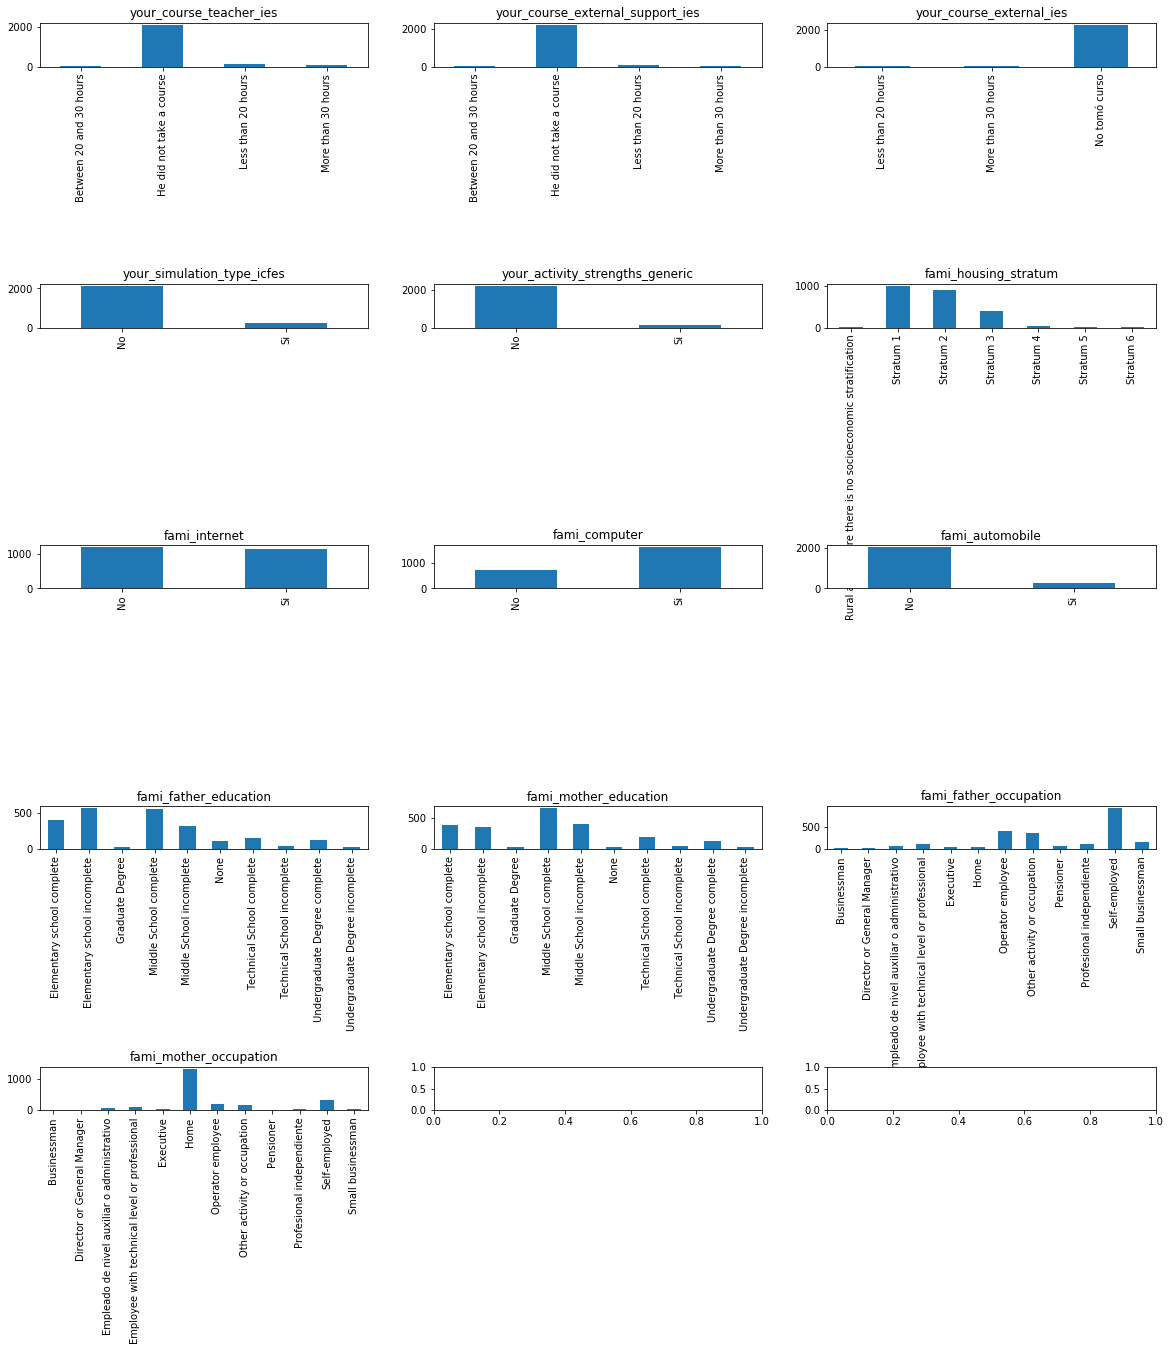

In [54]:
# Since fami mother and father work are all NaNs, use occupation instead

cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 5.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    superior_normalist_saber_pro.groupby(superior_normalist_saber_pro[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter],  title=i, xlabel="")
    counter += 1

### Technical Bachelor

In [55]:
hs_degree = ['Technical Bachelor']
technical_bachelor_saber_pro = saber.loc[saber['your_high_school_degree'].isin(hs_degree)]

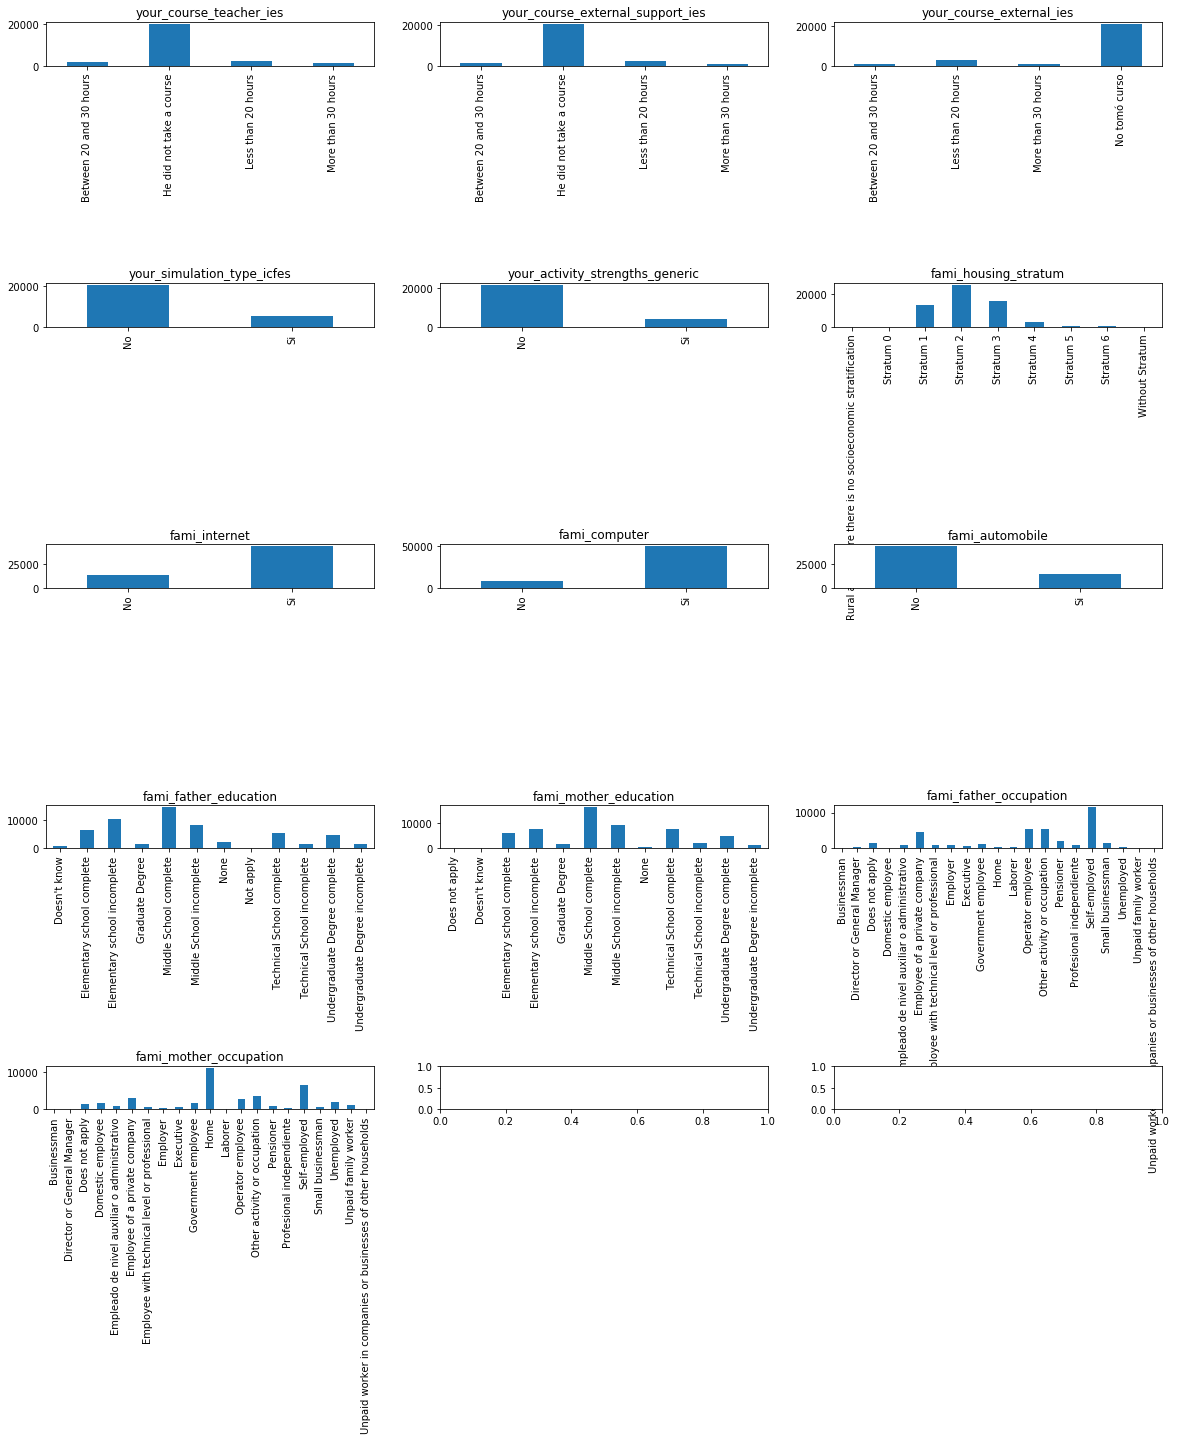

In [56]:
# Since fami mother and father work are all NaNs, use occupation instead

cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 5.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    technical_bachelor_saber_pro.groupby(technical_bachelor_saber_pro[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter],  title=i, xlabel="")
    counter += 1

### Insights for Superior Normalist

Similar to the insights generated for the bottom 50 municipalities with the exception that students from superior normalist schools have access to the internet, majority of students also did not take preparation tests and live on Stratum 1 housing. Furthermore, majority of their parents finished only up to Elementary and Middle School with the father being self-employed and the mother staying at home. These insights show similarities with the Bottom 50 Municipalities. 

### Insights for Technical Bachelor

Same with Superior Normalist except that majority of students with this high school degre live in Stratum 2 housing.

##### Additional question: Do the municipalities of these students belong to the Bottom 50? 
##### Additional question for municipality analysis: What's the lowest score per municipality? Is there a consistent low score among Saber areas?

## Scores by Undergraduate Core

#### Questions: What's the mean score for every undergraduate core? What are the characteristics of students who belong in the cores with highest and lowest scores?

In [57]:
print("There are {} unique undergraduate cores in this dataset".format(saber['your_undergraduate_core'].nunique()))

There are 63 unique undergraduate cores in this dataset


In [58]:
print("The top 10 undergraduate cores based on number of students are \n\n{}".format(saber['your_undergraduate_core'].value_counts().head(10)))

The top 10 undergraduate cores based on number of students are 

ADMINISTRATION                         35790
LAW                                    15263
PUBLIC ACCOUNTING                      14334
EDUCATION                              14219
INDUSTRIAL ENGINEERING                 10660
PSYCHOLOGY                             10518
ENVIRONMENTAL, SANITARY ENGINEERING     8231
UNCLASSIFIED                            8091
CIVIL ENGINEERING                       7736
SOCIAL COMMUNICATION, JOURNALISM        7479
Name: your_undergraduate_core, dtype: int64


Now let's examine the mean scores of students from every undergraduate core. 

In [59]:
sorted_mean_undergraduate_core = saber.groupby("your_undergraduate_core")[total_marks].agg(["mean", "count"]).sort_values(by=("total_saber_pro_score", "mean"), ascending=False).reset_index()
sorted_mean_undergraduate_core

your_undergraduate_core total_saber_score         \
                                                                  mean  count   
0                                            PHISICS        528.387435    191   
1         POLITICAL SCIENCE, INTERNATIONAL RELATIONS        479.516254   2061   
2                         ANTHROPOLOGY, LIBERAL ARTS        485.922886    402   
3          MODERN LANGUAGES, LITERATURE, LINGUISTICS        478.455865    827   
4                                   MATH, STATISTICS        490.619898    392   
5                                           MEDICINE        500.939942   2764   
6                               CHEMICAL ENGINEERING        492.063681   1853   
7                               PHILOSOPHY, THEOLOGY        465.083333    336   
8                         ADMINISTRATIVE ENGINEERING        465.229901    709   
9                             BIOMEDICAL ENGINEERING        463.157197    528   
10                             BIOLOGY, MICROBIOLOGY        464.484132   1607   
11                                               LAW        438.401494  15263   
12                                NUTRITION AND DIET        438.306818    264   
13                  AGROINDUSTRIAL ENGINEERING, FOOD        449.119403    469   
14                              PLASTIC, VISUAL ARTS        457.840951    547   
15                                             MUSIC        482.310811    444   
16                                      BACTERIOLOGY        440.436573    607   
17                                      ARCHITECTURE        453.720081   3969   
18                                GEOGRAPHY, HISTORY        437.035556    675   
19                AGRICULTURAL, FORESTRY ENGINEERING        450.563433    268   
20                               VETERINARY MEDICINE        439.493036   1077   
21                           NUTRITION AND DIETETICS        427.430769    325   
22                  SOCIAL COMMUNICATION, JOURNALISM        435.071266   7479   
23                                 CIVIL ENGINEERING        452.878490   7736   
24                                        PSYCHOLOGY        422.851398  10518   
25                                        ODONTOLOGY        422.665851    817   
26                            ELECTRICAL ENGINEERING        465.816139    979   
27                            INDUSTRIAL ENGINEERING        450.663884  10660   
28                    MINING, METALLURGY ENGINEERING        483.299347   1226   
29                                         THERAPIES        411.675728   2575   
30                                           NURSING        411.531977   3440   
31                         PLASTIC ARTS, VISUAL ARTS        461.390663    814   
32                            SOCIOLOGY, SOCIAL WORK        407.695720   3832   
33  TRAINING RELATED TO THE MILITARY OR POLICE FIELD        417.898810    168   
34                               REPRESENTATIVE ARTS        450.457317    164   
35                          SURGICAL INSTRUMENTATION        403.477099    786   
36                                           ECONOMY        447.872152   7243   
37                                         EDUCATION        405.748576  14219   
38                                       ADVERTISING        428.266802    982   
39                                 OTHER ENGINEERING        459.507143   1120   
40                  AGRONOMIC, LIVESTOCK ENGINEERING        423.447263    749   
41         SPORTS, PHYSICAL EDUCATION AND RECREATION        410.261402    899   
42                                         CHEMISTRY        464.271605    972   
43                                         DENTISTRY        424.774574    763   
44        ELECTRONIC ENGINEERING, TELECOMMUNICATIONS        455.913533   2845   
45          OPTOMETRY, OTHER HEALTH SCIENCE PROGRAMS        405.010989    273   
46               AGROINDUSTRIAL AND FOOD ENGINEERING        437.027484    473   
47                                            DESIGN        

In [60]:
top_10_undergraduate_cores_by_number = saber['your_undergraduate_core'].value_counts().head(10).index.to_list()

In [61]:
top_cores_rank = sorted_mean_undergraduate_core.loc[sorted_mean_undergraduate_core['your_undergraduate_core'].isin(top_10_undergraduate_cores_by_number)]
top_cores_rank.drop('total_saber_score', inplace=True, axis=1)
top_cores_rank

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


your_undergraduate_core total_saber_pro_score       
                                                         mean  count
11                                  LAW            789.474388  15263
22     SOCIAL COMMUNICATION, JOURNALISM            757.250977   7479
23                    CIVIL ENGINEERING            754.936798   7736
24                           PSYCHOLOGY            753.435920  10518
27               INDUSTRIAL ENGINEERING            741.511008  10660
37                            EDUCATION            700.987493  14219
50                       ADMINISTRATION            512.597000  35790
51  ENVIRONMENTAL, SANITARY ENGINEERING            510.305410   8231
54                    PUBLIC ACCOUNTING            452.819047  14334
59                         UNCLASSIFIED            211.816553   8091

We see in the charts about that the top 10 undergraduate cores do not even belong to the cores in which students had the highest mean saber scores. Why?

##### Question: In which municipalities do these students who take up the top 10 undergraduate cores live in?

In [62]:
saber[['your_municipality_resides', 'your_undergraduate_core']]

your_municipality_resides      your_undergraduate_core
0                       GUATEQUE            PUBLIC ACCOUNTING
1                        LETICIA  MILITARY OR POLICE TRAINING
2                   DOSQUEBRADAS            PUBLIC ACCOUNTING
3            CARTAGENA DE INDIAS                      ECONOMY
4                         SOACHA               ADMINISTRATION
...                          ...                          ...
212005                  VALENCIA            CIVIL ENGINEERING
212006               BOGOTÁ D.C.                     MEDICINE
212007                   CORINTO               ADMINISTRATION
212008             VILLAVICENCIO       INDUSTRIAL ENGINEERING
212009                      CALI                    THERAPIES

[212010 rows x 2 columns]

In [63]:
saber_pro_top_10_undergraduate_cores = saber.loc[saber['your_undergraduate_core'].isin(top_10_undergraduate_cores_by_number)]
saber_pro_top_10_undergraduate_cores.shape

(132321, 144)

In [64]:
top_10_undergraduate_cores_by_municipality = saber.groupby(['your_undergraduate_core', 'your_municipality_resides'])['total_saber_pro_score'].count()

In [65]:
saber.groupby(['your_undergraduate_core', 'your_municipality_resides'])['total_saber_pro_score'].size()

your_undergraduate_core  your_municipality_resides
ADMINISTRATION           ABEJORRAL                     4
                         ACACÍAS                      28
                         ACEVEDO                       2
                         ACHÍ                          3
                         AGRADO                        4
                                                      ..
ZOOTECHNY                VILLAVICENCIO                 5
                         VILLAVIEJA                    1
                         YUMBO                         1
                         ZIPAQUIRÁ                     2
                         ÁBREGO                        1
Name: total_saber_pro_score, Length: 10939, dtype: int64

In [66]:
top_10_undergraduate_cores_by_municipality['ADMINISTRATION'].sort_values(ascending=False).head(10).index

Index(['BOGOTÁ D.C.', 'MEDELLÍN', 'CALI', 'BARRANQUILLA',
       'CARTAGENA DE INDIAS', 'IBAGUÉ', 'PEREIRA', 'BUCARAMANGA', 'MANIZALES',
       'SOACHA'],
      dtype='object', name='your_municipality_resides')

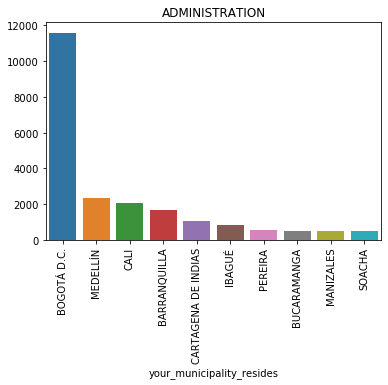

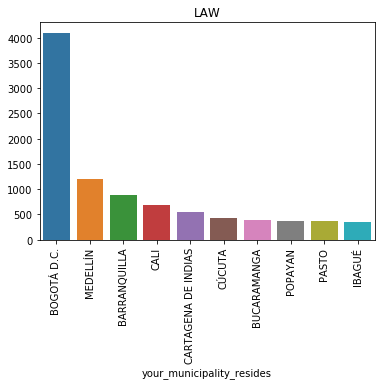

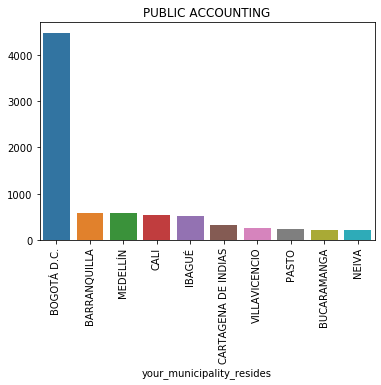

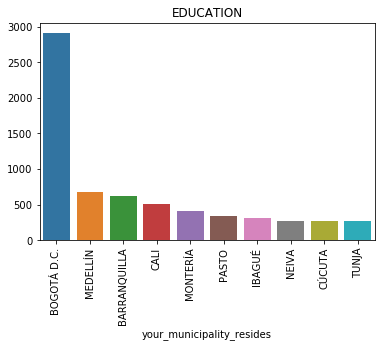

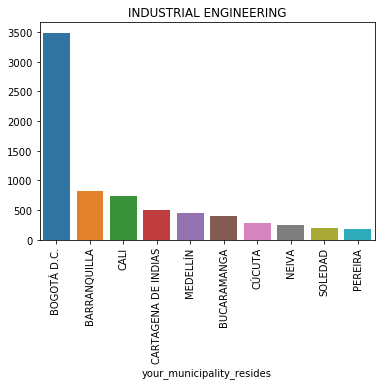

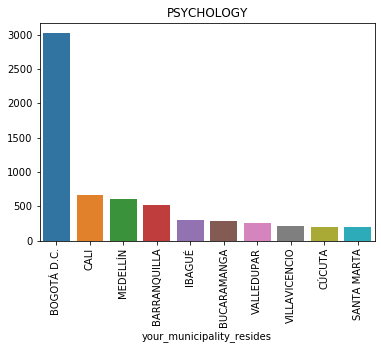

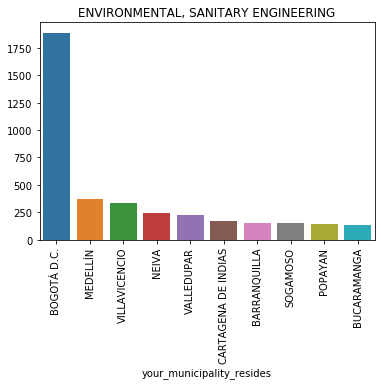

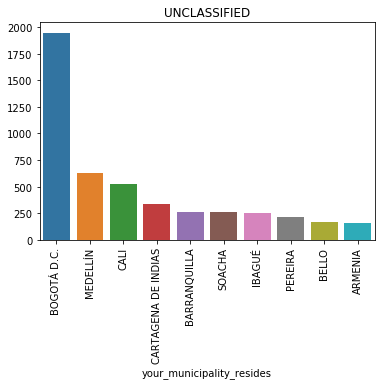

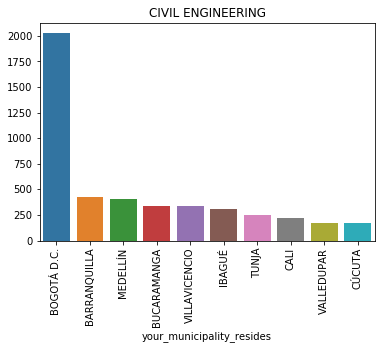

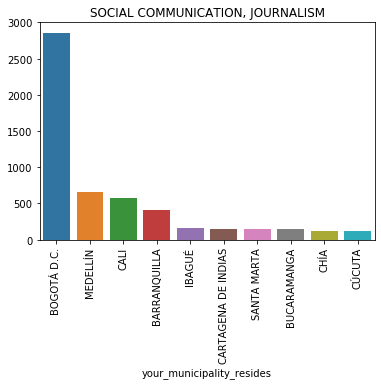

In [67]:
for i in top_10_undergraduate_cores_by_number: 
    plt.figure()
    sns.barplot(x = top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).index,  
                y=top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).values)
    plt.xticks(rotation=90)
    plt.title(i)

In [68]:
for i in top_10_undergraduate_cores_by_number:    
    # Checking for intersection between sets
    set1 = set(top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).index.to_list()) 
    intersection = set1.intersection(saber_pro_bot_50_municipalities)
    intersection_list = list(intersection)
    print("\nOut of the top 10 municipalities for {}, {} municipalities belong to the bottom 50 of saber pro scores".format(i, len(intersection_list)))


Out of the top 10 municipalities for ADMINISTRATION, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for LAW, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PUBLIC ACCOUNTING, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for EDUCATION, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for INDUSTRIAL ENGINEERING, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PSYCHOLOGY, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for ENVIRONMENTAL, SANITARY ENGINEERING, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for UNCLASSIFIED, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for CIVIL ENGINEERING, 0 municipalit

#### It is very interesting to note that no municipalities belonging in the top 10 by undergraduate core by number belong to the bottom 50!

Does this mean these students belong to the Top municipalities despite having low mean scores?

In [69]:
for i in top_10_undergraduate_cores_by_number:    
    # Checking for intersection between sets
    set1 = set(top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).index.to_list()) 
    intersection = set1.intersection(saber_pro_top_50_municipalities)
    intersection_list = list(intersection)
    print("\nOut of the top 10 municipalities for {}, {} municipalities belong to the bottom 50 of saber pro scores".format(i, len(intersection_list)))


Out of the top 10 municipalities for ADMINISTRATION, 2 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for LAW, 3 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PUBLIC ACCOUNTING, 3 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for EDUCATION, 4 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for INDUSTRIAL ENGINEERING, 2 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PSYCHOLOGY, 2 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for ENVIRONMENTAL, SANITARY ENGINEERING, 1 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for UNCLASSIFIED, 1 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for CIVIL ENGINEERING, 3 municipalit

#### Some of these students belong to the municipalities who supposedly has the highest scores in Saber Pro but their undergraduate cores are not that high in terms of mean scores. 

## Next Steps: 

1. Question: Why are students going to an undergraduate score with low mean Saber Pro scores when they belong to the municipalities that rank in the Top 50 in terms of Saber Pro scores?
2. Question: Where do the students who rank highest in terms of scores come from? Do they come from low municipalities? Does this mean students who have higher scores are underepresented? Are there students who got high scores but are affected by their social situation?
3. Question: Where do the students who belong to the majority live then? Maybe not the Top 50 but rather the Top 100? 200? Do they belong in the middle? 
4. Add analysis based on fami_dependents and fami_is_head
5. Add an analysis for institutions and ethnicity. Do the students from the top municipalities go to the top institutions and do the students from the bottom municipalities go to the low score-ranked institutions?
6. Show the distributions for Saber as well. Even though the correlations aren't as strong, it is still nice to put in visualization for Saber scores and not only Saber Pro.
7. Check students migration pattern. Are they migrating to cities with better education?
8. Perform Analysis on Departments as well. A department can contain municipalities so this is a higher level aggregation of analysis. 

Feel free to ask more questions! There is much more we can discover about the student population!